In [5]:
# Passo 1 e 2 da Instrução:

# Importar a biblioteca pandas para manipulação e análise de dados
import pandas as pd
# Importar numpy para funcionalidades numéricas, como np.nan para representar valores ausentes, se necessário
import numpy as np

# --- Definição dos Caminhos dos Arquivos ---
# Especificar os caminhos completos para os arquivos Excel que serão utilizados.
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
file_path_dados_limpos_excel = 'C:/Users/Inteli/Desktop/wms_dados_limpos.xlsx' # Novo caminho para o arquivo Excel de saída

# Nomes das abas inferidos dos nomes dos arquivos CSV originais.
sheet_name_data_principal = 'wms_da_textbook' # Aba no arquivo wms_da_textbook.xlsx
sheet_name_dicionario = 'Sheet2'          # Aba no arquivo VARIABLES_wms.xlsx
sheet_name_dados_limpos = 'Dados Limpos'    # Nome da aba para o arquivo Excel de saída

# --- Carregamento e Análise Preliminar do Dicionário de Variáveis ---
# O dicionário de variáveis ajuda a entender o significado de cada coluna no dataset principal.
print("--- Iniciando Carregamento do Dicionário de Variáveis ---")
try:
    # Tentar ler a aba especificada do arquivo Excel do dicionário de variáveis
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
    # Exibir mensagem de sucesso e informações básicas sobre o dicionário carregado
    print(f"Arquivo do dicionário de variáveis '{file_path_dicionario_variaveis_wms}' (Aba: '{sheet_name_dicionario}') carregado com sucesso.")
    print(f"O dicionário contém {df_dicionario_wms.shape[0]} variáveis e {df_dicionario_wms.shape[1]} colunas descritivas.")

    # Visualizar as primeiras linhas do dicionário de variáveis para inspeção inicial
    print("\nVisualização inicial do dicionário de variáveis (primeiras 5 linhas):\n")
    print(df_dicionario_wms.head().to_string()) # .to_string() para melhor formatação no console

    # Tentar localizar e exibir a descrição da variável 'talent6' no dicionário
    # Supõe-se que a coluna com os nomes das variáveis se chama 'Variable name'
    if 'Variable name' in df_dicionario_wms.columns:
        info_talent6_wms = df_dicionario_wms[df_dicionario_wms['Variable name'] == 'talent6']
        if not info_talent6_wms.empty:
            print("\nInformações sobre a variável 'talent6' encontradas no dicionário:")
            # Usar to_string() para garantir que toda a informação da(s) linha(s) seja impressa
            print(info_talent6_wms.to_string())
        else:
            # Mensagem caso 'talent6' não seja encontrada na coluna esperada
            print("\nAVISO: A variável 'talent6' não foi encontrada na coluna 'Variable name' do dicionário.")
    else:
        # Mensagem caso a coluna 'Variable name' não exista no dicionário
        print("\nAVISO: A coluna 'Variable name' não foi encontrada no dicionário de variáveis.")
        print(f"Colunas disponíveis no dicionário: {df_dicionario_wms.columns.tolist()}")

except FileNotFoundError:
    # Tratamento de erro caso o arquivo do dicionário não seja encontrado
    print(f"\nERRO CRÍTICO: O arquivo do dicionário de variáveis '{file_path_dicionario_variaveis_wms}' não foi encontrado.")
    print("A análise prosseguirá, mas o contexto detalhado das variáveis pode estar ausente.")
    df_dicionario_wms = None # Definir como None para checagens posteriores
except ValueError as ve:
    # Tratamento de erro caso a aba especificada não seja encontrada no arquivo Excel
    print(f"\nERRO: A aba '{sheet_name_dicionario}' não foi encontrada no arquivo '{file_path_dicionario_variaveis_wms}'. Verifique o nome da aba. {ve}")
    df_dicionario_wms = None # Definir como None
except Exception as e:
    # Tratamento para outros erros que possam ocorrer durante o carregamento do dicionário
    print(f"\nERRO: Ocorreu um erro inesperado ao carregar ou processar o dicionário '{file_path_dicionario_variaveis_wms}': {e}")
    df_dicionario_wms = None # Definir como None
print("--- Carregamento do Dicionário de Variáveis Concluído ---")

# --- Carregamento e Limpeza do Dataset Principal (WMS) ---
print("\n--- Iniciando Carregamento e Limpeza do Dataset Principal (WMS) ---")
df_dados_limpos_wms = None # Inicializar para ter um valor caso o try falhe antes da atribuição
try:
    # Carregar a aba especificada do arquivo de dados principal do WMS.
    # O parâmetro 'na_values' ainda é útil com pd.read_excel para strings específicas que devem ser NaN,
    # embora o Excel já tenha sua própria representação de células vazias como NaN.
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    # Exibir mensagem de sucesso e dimensões originais do dataset
    print(f"Dataset principal '{file_path_data_principal_wms}' (Aba: '{sheet_name_data_principal}') carregado com sucesso.")
    print(f"Dimensões originais do dataset: {df_dados_wms.shape[0]} linhas, {df_dados_wms.shape[1]} colunas.")

    # Visualizar as primeiras linhas do dataset principal para inspeção
    print("\nVisualização inicial dos dados do WMS (primeiras 5 linhas):\n")
    print(df_dados_wms.head().to_string())

    # Instrução do Passo 2: Lidar com valores ausentes na coluna 'talent6'.
    # Verificar se a coluna 'talent6' existe no DataFrame.
    if 'talent6' in df_dados_wms.columns:
        # Contar e exibir o número de valores ausentes (NA ou NaN) na coluna 'talent6' ANTES da remoção.
        # O método .isnull() retorna True para cada valor ausente, e .sum() conta esses Trues.
        ausentes_antes_talent6_wms = df_dados_wms['talent6'].isnull().sum()
        print(f"\nAnálise da coluna 'talent6':")
        print(f"Número de observações com 'talent6' ausente (NA) ANTES da remoção: {ausentes_antes_talent6_wms}")

        # Remover as linhas (observações) onde a coluna 'talent6' possui valor ausente.
        # O método dropna() com 'subset' especifica a coluna a ser considerada para a remoção.
        # 'inplace=False' (padrão) cria um novo DataFrame, não modificando o original diretamente.
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6'])

        # Contar e exibir o número de valores ausentes em 'talent6' DEPOIS da remoção (deve ser 0).
        ausentes_depois_talent6_wms = df_dados_limpos_wms['talent6'].isnull().sum()
        print(f"Número de observações com 'talent6' ausente (NA) DEPOIS da remoção: {ausentes_depois_talent6_wms}")

        # Exibir as novas dimensões do DataFrame e o número de linhas que foram removidas.
        linhas_removidas_wms = df_dados_wms.shape[0] - df_dados_limpos_wms.shape[0]
        print(f"Dimensões do dataset APÓS remoção de NAs em 'talent6': {df_dados_limpos_wms.shape[0]} linhas, {df_dados_limpos_wms.shape[1]} colunas.")
        print(f"Total de {linhas_removidas_wms} linhas foram removidas devido a valores ausentes em 'talent6'.")

        # O DataFrame 'df_dados_limpos_wms' agora está pronto para as análises subsequentes.
        print("\nProcesso de limpeza da variável 'talent6' no dataset WMS concluído.")
        
        # Visualizar as primeiras linhas do dataset limpo
        print("\nVisualização dos dados do WMS APÓS limpeza (primeiras 5 linhas):\n")
        print(df_dados_limpos_wms.head().to_string())

        # --- Salvando o DataFrame limpo em um novo arquivo Excel ---
        try:
            df_dados_limpos_wms.to_excel(file_path_dados_limpos_excel, sheet_name=sheet_name_dados_limpos, index=False)
            print(f"\nOs dados limpos foram salvos com sucesso em: '{file_path_dados_limpos_excel}' (Aba: '{sheet_name_dados_limpos}')")
        except Exception as e_save:
            print(f"\nERRO ao salvar o arquivo Excel com dados limpos: {e_save}")

    else:
        # Mensagem de erro caso a coluna 'talent6' não seja encontrada no dataset.
        print(f"\nERRO: A coluna 'talent6' não foi encontrada no dataset '{file_path_data_principal_wms}' (Aba: '{sheet_name_data_principal}').")
        print("Verifique o nome da coluna no arquivo original ou no dicionário de variáveis.")
        print(f"Colunas disponíveis no dataset: {df_dados_wms.columns.tolist()}")
        # Em caso de erro, 'df_dados_limpos_wms' pode ser uma cópia do original para evitar quebras em código subsequente,
        # ou o script pode ser interrompido dependendo da criticidade.
        df_dados_limpos_wms = df_dados_wms.copy() # Mantém o DataFrame original se 'talent6' não for encontrado

except FileNotFoundError:
    # Tratamento de erro caso o arquivo de dados principal não seja encontrado.
    print(f"\nERRO CRÍTICO: O arquivo de dados principal '{file_path_data_principal_wms}' não foi encontrado.")
    print("O script não pode prosseguir com a análise dos dados do WMS.")
except ValueError as ve:
    # Tratamento de erro caso a aba especificada não seja encontrada no arquivo Excel
    print(f"\nERRO: A aba '{sheet_name_data_principal}' não foi encontrada no arquivo '{file_path_data_principal_wms}'. Verifique o nome da aba. {ve}")
except Exception as e:
    # Tratamento para outros erros que possam ocorrer durante o carregamento ou processamento dos dados principais.
    print(f"\nERRO CRÍTICO: Ocorreu um erro inesperado ao carregar ou processar o dataset principal '{file_path_data_principal_wms}': {e}")
print("--- Carregamento e Limpeza do Dataset Principal (WMS) Concluídos ---")

# Ao final desta execução, se bem-sucedida, o DataFrame 'df_dados_limpos_wms'
# Conterá os dados do World Management Survey com as linhas onde 'talent6' era ausente removidas,
# E uma tentativa de salvá-lo em um novo arquivo Excel terá sido feita.
# Este DataFrame deve ser usado para as próximas etapas do Trabalho Prático.

--- Iniciando Carregamento do Dicionário de Variáveis ---
Arquivo do dicionário de variáveis 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx' (Aba: 'Sheet2') carregado com sucesso.
O dicionário contém 41 variáveis e 3 colunas descritivas.

Visualização inicial do dicionário de variáveis (primeiras 5 linhas):

       variable     type                        information
0        firmid  numeric                     Unique firm ID
1          wave  numeric  Wave when interview was conducted
2       country   string  Country in which plant is located
3           cty   string              2-letter country code
4  i_comptenure  numeric        Manager's tenure in company

AVISO: A coluna 'Variable name' não foi encontrada no dicionário de variáveis.
Colunas disponíveis no dicionário: ['variable', 'type', 'information']
--- Carregamento do Dicionário de Variáveis Concluído ---

--- Iniciando Carregamento e Limpeza do Dataset Principal (WMS) ---
Dataset principal 'C:/Users/Inteli/Desktop/wms_da_textb

In [6]:
# Passo 3 da Instrução:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter

# Configurações de exibição do Pandas para saídas de texto (console)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 800)
pd.set_option('display.max_colwidth', 50)

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
file_path_dados_com_scores_excel = 'C:/Users/Inteli/Desktop/wms_dados_com_scores.xlsx' # Arquivo de saída

# Nomes das abas nos arquivos Excel
sheet_name_data_principal = 'wms_da_textbook'
sheet_name_dicionario = 'Sheet2'
sheet_name_dados_com_scores = 'Dados com Scores'

# --- Passo 1 (Silencioso): Carregamento do Dicionário de Variáveis ---
df_dicionario_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
except Exception:
    pass # Erros no carregamento do dicionário são ignorados para focar no Passo 3

# --- Passo 2 (Silencioso): Carregamento e Limpeza do Dataset Principal ---
df_dados_limpos_wms = None
df_dados_wms = None
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        # Remove linhas com 'talent6' ausente e cria cópia para evitar SettingWithCopyWarning
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy() # Usa cópia se 'talent6' não existir
    else: # Falha no carregamento inicial
        raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None # Impede a continuação

# --- Passo 3: Criação de Novas Colunas de Scores Agregados ---
# A saída do terminal/Jupyter começará aqui, se os dados foram preparados com sucesso.
if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    print("--- 3. Criando Novas Colunas de Scores Agregados ---")
    
    # Definição das colunas componentes para cada score
    operations_cols = ['lean1', 'lean2']
    monitor_cols = ['perf1', 'perf2', 'perf3', 'perf4', 'perf5']
    target_cols = ['perf6', 'perf7', 'perf8', 'perf9', 'perf10']
    people_cols = ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']
    management_base_cols = operations_cols + monitor_cols + target_cols + people_cols # 18 colunas base

    # Calcula e atribui os scores usando .loc para modificar o DataFrame diretamente
    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[operations_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[monitor_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[target_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[people_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    
    print("Scores agregados ('operations', 'monitor', 'target', 'people', 'management') criados.")

    # Exibe amostra dos dados com os novos scores
    cols_to_show = ['firmid', 'country', 'operations', 'monitor', 'target', 'people', 'management']
    cols_to_show_existing = [col for col in cols_to_show if col in df_dados_limpos_wms.columns]
    
    print("\nExemplo (texto) dos dados com novos scores (primeiras 5 linhas):\n")
    print(df_dados_limpos_wms[cols_to_show_existing].head().to_string())
    
    print("\nExemplo (HTML) dos dados com novos scores (renderizado no Jupyter - primeiras 5 linhas):\n")
    display(HTML(df_dados_limpos_wms[cols_to_show_existing].head().to_html(notebook=True, border=1)))

    # --- 4. Estatísticas Descritivas dos Novos Scores ---
    print("\n--- 4. Estatísticas Descritivas dos Novos Scores ---")
    new_score_cols = ['operations', 'monitor', 'target', 'people', 'management']
    new_score_cols_existing = [col for col in new_score_cols if col in df_dados_limpos_wms.columns]
    descriptive_stats_df = None
    
    if new_score_cols_existing:
         descriptive_stats_df = df_dados_limpos_wms[new_score_cols_existing].describe()
         print("\nEstatísticas Descritivas (texto):\n")
         print(descriptive_stats_df.to_string())
         
         print("\nEstatísticas Descritivas (HTML - renderizado no Jupyter):\n")
         display(HTML(descriptive_stats_df.to_html(notebook=True, border=1)))
    else:
        print("AVISO: Scores não criados; estatísticas descritivas não geradas.")
    
    # --- 5. Salvando Dados com Scores em Arquivo Excel ---
    print("\n--- 5. Salvando Dados com Scores em Arquivo Excel ---")
    try:
        df_dados_limpos_wms.to_excel(file_path_dados_com_scores_excel, sheet_name=sheet_name_dados_com_scores, index=False)
        print(f"Dados com scores salvos em: '{file_path_dados_com_scores_excel}'")
        print("NOTA: O arquivo Excel salvo contém TODOS os dados para visualização completa.")
    except Exception as e_save:
        print(f"\nERRO ao salvar arquivo Excel '{file_path_dados_com_scores_excel}': {e_save}")
else:
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")
    print("Não é possível exibir ou processar o Passo 3 e subsequentes.")

print("\n--- Processamento Concluído ---")

--- 3. Criando Novas Colunas de Scores Agregados ---
Scores agregados ('operations', 'monitor', 'target', 'people', 'management') criados.

Exemplo (texto) dos dados com novos scores (primeiras 5 linhas):

   firmid        country  operations  monitor  target    people  management
0       1  United States         3.0      3.6     3.6  3.500000    3.500000
1       1  United States         5.0      3.8     2.6  2.500000    3.166667
2       1  United States         2.0      2.8     3.6  3.000000    3.000000
3       2  United States         4.5      4.8     4.4  4.833333    4.666667
4       2  United States         4.5      4.6     4.4  4.333333    4.444444

Exemplo (HTML) dos dados com novos scores (renderizado no Jupyter - primeiras 5 linhas):



,firmid,country,operations,monitor,target,people,management
0,1,United States,3.0,3.6,3.6,3.500000,3.500000
1,1,United States,5.0,3.8,2.6,2.500000,3.166667
2,1,United States,2.0,2.8,3.6,3.000000,3.000000
3,2,United States,4.5,4.8,4.4,4.833333,4.666667
4,2,United States,4.5,4.6,4.4,4.333333,4.444444



--- 4. Estatísticas Descritivas dos Novos Scores ---

Estatísticas Descritivas (texto):

         operations       monitor        target        people    management
count  13653.000000  13653.000000  13653.000000  13653.000000  13653.000000
mean       2.857156      3.217959      2.856266      2.765393      2.926544
std        1.054434      0.819405      0.786111      0.649060      0.669824
min        1.000000      1.000000      1.000000      1.000000      1.000000
25%        2.000000      2.600000      2.400000      2.333333      2.500000
50%        3.000000      3.200000      2.800000      2.666667      2.944444
75%        3.500000      3.800000      3.400000      3.166667      3.388889
max        5.000000      5.000000      5.000000      5.000000      5.000000

Estatísticas Descritivas (HTML - renderizado no Jupyter):



,operations,monitor,target,people,management
count,13653.000000,13653.000000,13653.000000,13653.000000,13653.000000
mean,2.857156,3.217959,2.856266,2.765393,2.926544
std,1.054434,0.819405,0.786111,0.649060,0.669824
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.600000,2.400000,2.333333,2.500000
50%,3.000000,3.200000,2.800000,2.666667,2.944444
75%,3.500000,3.800000,3.400000,3.166667,3.388889
max,5.000000,5.000000,5.000000,5.000000,5.000000



--- 5. Salvando Dados com Scores em Arquivo Excel ---
Dados com scores salvos em: 'C:/Users/Inteli/Desktop/wms_dados_com_scores.xlsx'
NOTA: O arquivo Excel salvo contém TODOS os dados para visualização completa.

--- Processamento Concluído ---


In [7]:
#Passo 4:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter

# --- Configurações de Exibição do Pandas para Saída de Texto ---
pd.set_option('display.max_rows', 20) 
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000) # Aumentar para tabelas de ranking
pd.set_option('display.max_colwidth', 50)

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
# Arquivo Excel de saída que será atualizado com novas abas
file_path_output_excel = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 

# Nomes das abas nos arquivos Excel
sheet_name_data_principal = 'wms_da_textbook'
sheet_name_dicionario = 'Sheet2'
# Nomes das novas abas para o arquivo de saída
sheet_name_dados_com_scores = 'Dados com Scores Agregados'
sheet_name_media_pais = 'Media_Scores_Pais'
sheet_name_ranking_pais = 'Ranking_Scores_Pais'

# --- Passo 1 (Silencioso): Carregamento do Dicionário de Variáveis ---
df_dicionario_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
except Exception:
    pass 

# --- Passo 2 (Silencioso): Carregamento e Limpeza do Dataset Principal ---
df_dados_limpos_wms = None
df_dados_wms = None
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy()
    else: 
        raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None

# --- Passo 3: Criação de Novas Colunas de Scores Agregados ---
if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    print("--- 3. Criando Novas Colunas de Scores Agregados ---")
    operations_cols = ['lean1', 'lean2']
    monitor_cols = ['perf1', 'perf2', 'perf3', 'perf4', 'perf5']
    target_cols = ['perf6', 'perf7', 'perf8', 'perf9', 'perf10']
    people_cols = ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']
    management_base_cols = operations_cols + monitor_cols + target_cols + people_cols

    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[operations_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[monitor_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[target_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[people_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    
    print("Scores agregados ('operations', 'monitor', 'target', 'people', 'management') criados.")
    cols_to_show_scores = ['firmid', 'country', 'operations', 'monitor', 'target', 'people', 'management']
    cols_to_show_scores_existing = [col for col in cols_to_show_scores if col in df_dados_limpos_wms.columns]
    
    print("\nExemplo (texto) dos dados com novos scores (primeiras 5 linhas):\n")
    print(df_dados_limpos_wms[cols_to_show_scores_existing].head().to_string())
    print("\nExemplo (HTML) dos dados com novos scores (renderizado no Jupyter - primeiras 5 linhas):\n")
    display(HTML(df_dados_limpos_wms[cols_to_show_scores_existing].head().to_html(notebook=True, border=1)))

    # --- Passo 4: Análise de Scores por País e Rankings ---
    print("\n--- 4. Análise de Scores por País e Rankings ---")
    score_cols = ['operations', 'monitor', 'target', 'people', 'management']
    
    # (i) Média dos scores por país
    # Verifica se a coluna 'country' existe
    if 'country' in df_dados_limpos_wms.columns:
        media_scores_pais = df_dados_limpos_wms.groupby('country')[score_cols].mean()
        # Ordena pela média do score 'management'
        media_scores_pais_sorted = media_scores_pais.sort_values(by='management', ascending=False)
        
        print("\n--- Tabela: Média dos Scores de Gestão por País ---")
        print("(Ordenada pelo score 'management', do maior para o menor)\n")
        print("Versão em texto:\n")
        print(media_scores_pais_sorted.to_string())
        print("\nVersão HTML (renderizada no Jupyter):\n")
        display(HTML(media_scores_pais_sorted.to_html(notebook=True, border=1)))

        # (ii) Ranking dos países para cada critério
        # 'ascending=False' para que maior score = melhor rank (menor número)
        # 'method='min'' para que em caso de empate, todos recebam o menor rank do grupo
        ranking_scores_pais = media_scores_pais.rank(method='min', ascending=False)
        ranking_scores_pais.columns = [f'Rank_{col}' for col in ranking_scores_pais.columns] # Renomeia colunas
        # Ordena pela coluna de ranking do 'management'
        ranking_scores_pais_sorted = ranking_scores_pais.sort_values(by='Rank_management', ascending=True)

        print("\n--- Tabela: Ranking dos Países por Scores de Gestão ---")
        print("(Ordenada pelo ranking do score 'management', do melhor para o pior)\n")
        print("Versão em texto:\n")
        print(ranking_scores_pais_sorted.to_string())
        print("\nVersão HTML (renderizada no Jupyter):\n")
        display(HTML(ranking_scores_pais_sorted.to_html(notebook=True, border=1)))
        
        # --- Salvando todas as tabelas geradas em um único arquivo Excel com múltiplas abas ---
        print(f"\n--- Salvando Resultados no Arquivo Excel: {file_path_output_excel} ---")
        try:
            with pd.ExcelWriter(file_path_output_excel, engine='openpyxl') as writer:
                # Salva os dados completos com scores individuais
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                    df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False)
                    print(f"- Aba '{sheet_name_dados_com_scores}' salva.")
                
                # Salva a média dos scores por país
                media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True) # Index=True para manter o nome do país
                print(f"- Aba '{sheet_name_media_pais}' salva.")

                # Salva o ranking dos scores por país
                ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True) # Index=True para manter o nome do país
                print(f"- Aba '{sheet_name_ranking_pais}' salva.")
            print(f"Arquivo Excel '{file_path_output_excel}' salvo/atualizado com sucesso.")
        except Exception as e_save_excel:
            print(f"ERRO ao salvar o arquivo Excel: {e_save_excel}")

    else:
        print("ERRO: Coluna 'country' não encontrada no DataFrame. Análise por país não pode ser realizada.")
else:
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")
    print("Não é possível exibir ou processar os Passos 3 e 4.")

print("\n--- Processamento Concluído ---")

--- 3. Criando Novas Colunas de Scores Agregados ---
Scores agregados ('operations', 'monitor', 'target', 'people', 'management') criados.

Exemplo (texto) dos dados com novos scores (primeiras 5 linhas):

   firmid        country  operations  monitor  target    people  management
0       1  United States         3.0      3.6     3.6  3.500000    3.500000
1       1  United States         5.0      3.8     2.6  2.500000    3.166667
2       1  United States         2.0      2.8     3.6  3.000000    3.000000
3       2  United States         4.5      4.8     4.4  4.833333    4.666667
4       2  United States         4.5      4.6     4.4  4.333333    4.444444

Exemplo (HTML) dos dados com novos scores (renderizado no Jupyter - primeiras 5 linhas):



,firmid,country,operations,monitor,target,people,management
0,1,United States,3.0,3.6,3.6,3.500000,3.500000
1,1,United States,5.0,3.8,2.6,2.500000,3.166667
2,1,United States,2.0,2.8,3.6,3.000000,3.000000
3,2,United States,4.5,4.8,4.4,4.833333,4.666667
4,2,United States,4.5,4.6,4.4,4.333333,4.444444



--- 4. Análise de Scores por País e Rankings ---

--- Tabela: Média dos Scores de Gestão por País ---
(Ordenada pelo score 'management', do maior para o menor)

Versão em texto:

                     operations   monitor    target    people  management
country                                                                  
United States          3.354727  3.585369  3.231884  3.206464    3.335250
Japan                  3.175926  3.514815  3.361728  2.972222    3.253772
Germany                3.218109  3.578152  3.210557  2.989247    3.239736
Sweden                 3.308707  3.655409  3.192612  2.853562    3.221050
Canada                 3.140704  3.534673  3.051256  2.943049    3.159408
Great Britain          2.988558  3.365673  3.002774  2.841944    3.048390
France                 3.061441  3.479944  2.974294  2.722928    3.040647
Italy                  3.005576  3.324535  2.972119  2.758984    3.002685
Australia              3.131692  3.277944  2.994433  2.732691    3.001190
Singap

,operations,monitor,target,people,management
country,,,,,
United States,3.354727,3.585369,3.231884,3.206464,3.335250
Japan,3.175926,3.514815,3.361728,2.972222,3.253772
Germany,3.218109,3.578152,3.210557,2.989247,3.239736
Sweden,3.308707,3.655409,3.192612,2.853562,3.221050
Canada,3.140704,3.534673,3.051256,2.943049,3.159408
Great Britain,2.988558,3.365673,3.002774,2.841944,3.048390
France,3.061441,3.479944,2.974294,2.722928,3.040647
Italy,3.005576,3.324535,2.972119,2.758984,3.002685
Australia,3.131692,3.277944,2.994433,2.732691,3.001190



--- Tabela: Ranking dos Países por Scores de Gestão ---
(Ordenada pelo ranking do score 'management', do melhor para o pior)

Versão em texto:

                     Rank_operations  Rank_monitor  Rank_target  Rank_people  Rank_management
country                                                                                      
United States                    1.0           2.0          2.0          1.0              1.0
Japan                            4.0           5.0          1.0          3.0              2.0
Germany                          3.0           3.0          3.0          2.0              3.0
Sweden                           2.0           1.0          4.0          5.0              4.0
Canada                           5.0           4.0          5.0          4.0              5.0
Great Britain                   11.0           7.0          6.0          7.0              6.0
France                           8.0           6.0          8.0         13.0              7.0
Italy    

,Rank_operations,Rank_monitor,Rank_target,Rank_people,Rank_management
country,,,,,
United States,1.0,2.0,2.0,1.0,1.0
Japan,4.0,5.0,1.0,3.0,2.0
Germany,3.0,3.0,3.0,2.0,3.0
Sweden,2.0,1.0,4.0,5.0,4.0
Canada,5.0,4.0,5.0,4.0,5.0
Great Britain,11.0,7.0,6.0,7.0,6.0
France,8.0,6.0,8.0,13.0,7.0
Italy,9.0,8.0,9.0,11.0,8.0
Australia,6.0,9.0,7.0,12.0,9.0



--- Salvando Resultados no Arquivo Excel: C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx ---
- Aba 'Dados com Scores Agregados' salva.
- Aba 'Media_Scores_Pais' salva.
- Aba 'Ranking_Scores_Pais' salva.
Arquivo Excel 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado com sucesso.

--- Processamento Concluído ---


--- 3. Criando Novas Colunas de Scores Agregados ---
Scores agregados criados.

--- 4. Análise de Scores por País e Rankings ---

--- Tabela: Média dos Scores de Gestão por País ---
(Ordenada pelo score 'management')



,operations,monitor,target,people,management
country,,,,,
United States,3.354727,3.585369,3.231884,3.206464,3.335250
Japan,3.175926,3.514815,3.361728,2.972222,3.253772
Germany,3.218109,3.578152,3.210557,2.989247,3.239736
Sweden,3.308707,3.655409,3.192612,2.853562,3.221050
Canada,3.140704,3.534673,3.051256,2.943049,3.159408
Great Britain,2.988558,3.365673,3.002774,2.841944,3.048390
France,3.061441,3.479944,2.974294,2.722928,3.040647
Italy,3.005576,3.324535,2.972119,2.758984,3.002685
Australia,3.131692,3.277944,2.994433,2.732691,3.001190



--- Tabela: Ranking dos Países por Scores de Gestão ---
(Ordenada pelo ranking do score 'management')



,Rank_operations,Rank_monitor,Rank_target,Rank_people,Rank_management
country,,,,,
United States,1.0,2.0,2.0,1.0,1.0
Japan,4.0,5.0,1.0,3.0,2.0
Germany,3.0,3.0,3.0,2.0,3.0
Sweden,2.0,1.0,4.0,5.0,4.0
Canada,5.0,4.0,5.0,4.0,5.0
Great Britain,11.0,7.0,6.0,7.0,6.0
France,8.0,6.0,8.0,13.0,7.0
Italy,9.0,8.0,9.0,11.0,8.0
Australia,6.0,9.0,7.0,12.0,9.0



--- 5. Gráfico de Barras: Score Médio de 'Management' por País ---

Gráfico salvo com sucesso em: 'C:/Users/Inteli/Desktop/management_scores_por_pais.png'


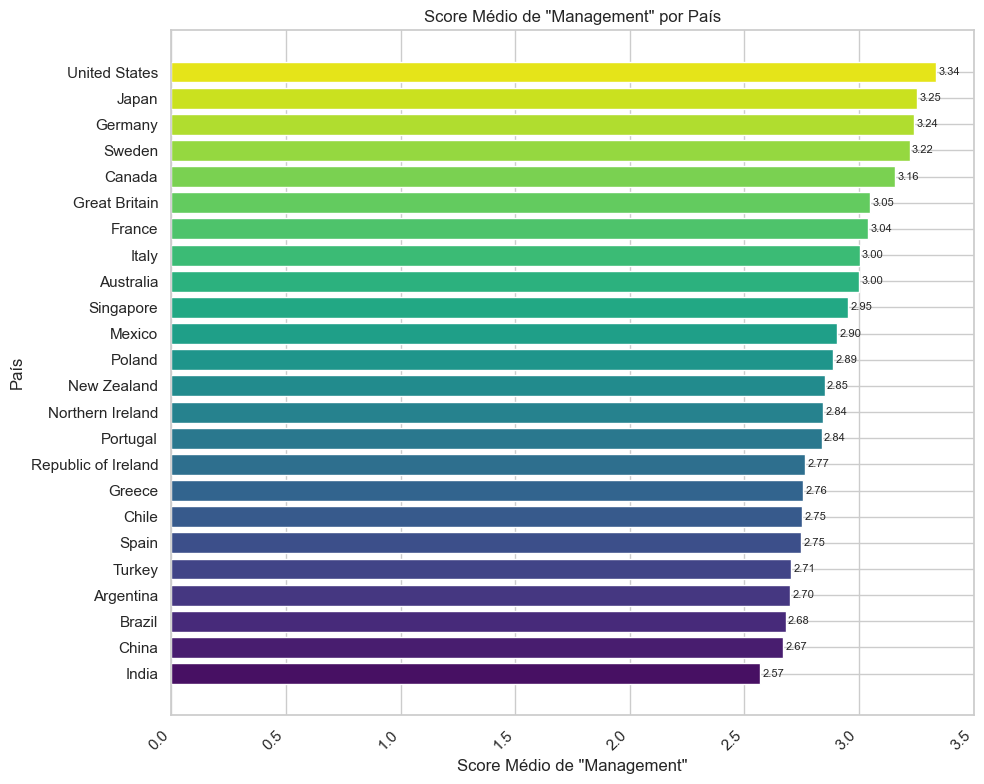


--- Salvando Resultados no Arquivo Excel: C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx ---
Arquivo Excel 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado com sucesso com todas as abas.

--- Processamento Concluído ---


In [8]:
# Passo 5:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para estilos de gráficos

# --- Configurações de Exibição e Estilo ---
# Pandas para Saída de Texto
pd.set_option('display.max_rows', 20) 
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 50)
# Estilo dos gráficos Seaborn
sns.set_theme(style="whitegrid")

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
file_path_output_excel = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 
file_path_output_grafico = 'C:/Users/Inteli/Desktop/management_scores_por_pais.png' # Saída do gráfico

# Nomes das abas nos arquivos Excel
sheet_name_data_principal = 'wms_da_textbook'
sheet_name_dicionario = 'Sheet2'
sheet_name_dados_com_scores = 'Dados com Scores Agregados'
sheet_name_media_pais = 'Media_Scores_Pais'
sheet_name_ranking_pais = 'Ranking_Scores_Pais'

# --- Passo 1 (Silencioso): Carregamento do Dicionário de Variáveis ---
df_dicionario_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
except Exception:
    pass 

# --- Passo 2 (Silencioso): Carregamento e Limpeza do Dataset Principal ---
df_dados_limpos_wms = None
df_dados_wms = None
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy()
    else: 
        raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None

# --- Passo 3: Criação de Novas Colunas de Scores Agregados ---
if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    print("--- 3. Criando Novas Colunas de Scores Agregados ---")
    operations_cols = ['lean1', 'lean2']
    monitor_cols = ['perf1', 'perf2', 'perf3', 'perf4', 'perf5']
    target_cols = ['perf6', 'perf7', 'perf8', 'perf9', 'perf10']
    people_cols = ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']
    management_base_cols = operations_cols + monitor_cols + target_cols + people_cols

    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[operations_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[monitor_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[target_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[people_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    
    print("Scores agregados criados.")
    # Omitindo a exibição de tabelas aqui para focar no Passo 4 e 5, mas os dados estão prontos.

    # --- Passo 4: Análise de Scores por País e Rankings ---
    print("\n--- 4. Análise de Scores por País e Rankings ---")
    score_cols = ['operations', 'monitor', 'target', 'people', 'management']
    media_scores_pais_sorted = None # Inicializa
    ranking_scores_pais_sorted = None # Inicializa
    
    if 'country' in df_dados_limpos_wms.columns:
        media_scores_pais = df_dados_limpos_wms.groupby('country')[score_cols].mean()
        media_scores_pais_sorted = media_scores_pais.sort_values(by='management', ascending=False)
        
        print("\n--- Tabela: Média dos Scores de Gestão por País ---")
        print("(Ordenada pelo score 'management')\n")
        display(HTML(media_scores_pais_sorted.to_html(notebook=True, border=1)))

        ranking_scores_pais = media_scores_pais.rank(method='min', ascending=False)
        ranking_scores_pais.columns = [f'Rank_{col}' for col in ranking_scores_pais.columns]
        ranking_scores_pais_sorted = ranking_scores_pais.sort_values(by='Rank_management', ascending=True)

        print("\n--- Tabela: Ranking dos Países por Scores de Gestão ---")
        print("(Ordenada pelo ranking do score 'management')\n")
        display(HTML(ranking_scores_pais_sorted.to_html(notebook=True, border=1)))
        
        # --- Passo 5: Gráfico de Barras dos Scores de 'Management' por País ---
        if media_scores_pais_sorted is not None:
            print("\n--- 5. Gráfico de Barras: Score Médio de 'Management' por País ---")
            
            plt.figure(figsize=(10, 8)) # Ajusta o tamanho da figura
            # Ordena para o gráfico de barras horizontais (maior no topo)
            data_para_grafico = media_scores_pais_sorted['management'].sort_values(ascending=True)
            
            bars = plt.barh(data_para_grafico.index, data_para_grafico.values, color=sns.color_palette("viridis", len(data_para_grafico)))
            
            plt.xlabel('Score Médio de "Management"')
            plt.ylabel('País')
            plt.title('Score Médio de "Management" por País')
            plt.xticks(rotation=45, ha="right") # Rotaciona os ticks do eixo X se necessário
            plt.tight_layout() # Ajusta o layout para não cortar os labels

            # Adiciona os valores nas barras
            for bar in bars:
                plt.text(bar.get_width() + 0.01,  # Posição X (um pouco depois da barra)
                         bar.get_y() + bar.get_height()/2, # Posição Y (centro da barra)
                         f'{bar.get_width():.2f}', # Texto (valor formatado)
                         va='center', ha='left', fontsize=8)

            # Salvar o gráfico
            try:
                plt.savefig(file_path_output_grafico, bbox_inches='tight')
                print(f"\nGráfico salvo com sucesso em: '{file_path_output_grafico}'")
            except Exception as e_save_plot:
                print(f"\nERRO ao salvar o gráfico: {e_save_plot}")
            
            plt.show() # Exibe o gráfico no Jupyter
        else:
            print("ERRO: Dados de média de scores por país não disponíveis para gerar gráfico.")

        # --- Salvando todas as tabelas geradas em um único arquivo Excel com múltiplas abas ---
        print(f"\n--- Salvando Resultados no Arquivo Excel: {file_path_output_excel} ---")
        try:
            with pd.ExcelWriter(file_path_output_excel, engine='openpyxl') as writer:
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                    df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False)
                if media_scores_pais_sorted is not None:
                    media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True)
                if ranking_scores_pais_sorted is not None:
                    ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True)
            print(f"Arquivo Excel '{file_path_output_excel}' salvo/atualizado com sucesso com todas as abas.")
        except Exception as e_save_excel:
            print(f"ERRO ao salvar o arquivo Excel: {e_save_excel}")
    else:
        print("ERRO: Coluna 'country' não encontrada. Análise por país e gráfico não podem ser realizados.")
else:
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")

print("\n--- Processamento Concluído ---")

In [ ]:
#Passo 6:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para estilos de gráficos

# --- Configurações de Exibição e Estilo ---
# Pandas para Saída de Texto (relevante para a saída visível do Passo 6)
pd.set_option('display.max_rows', 25) 
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 50)
# Estilo dos gráficos Seaborn (afetará o gráfico salvo do Passo 5)
sns.set_theme(style="whitegrid")

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
file_path_output_excel = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 
file_path_output_grafico = 'C:/Users/Inteli/Desktop/management_scores_por_pais.png'

# Nomes das abas
sheet_name_data_principal = 'wms_da_textbook'
sheet_name_dicionario = 'Sheet2'
sheet_name_dados_com_scores = 'Dados_com_Scores_Agregados'
sheet_name_media_pais = 'Media_Scores_Pais'
sheet_name_ranking_pais = 'Ranking_Scores_Pais'
# Nomes das abas do Passo 6 serão gerados dinamicamente

# --- Passos 1 e 2 (Silenciosos): Carregamento e Limpeza Inicial ---
df_dicionario_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
except Exception: pass 

df_dados_limpos_wms = None
df_dados_wms = None
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy()
    else: 
        raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None

# --- Passo 3 (Silencioso): Criação de Scores Agregados ---
if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    # print("--- 3. Criando Novas Colunas de Scores Agregados ---") # Saída suprimida
    operations_cols = ['lean1', 'lean2']
    monitor_cols = ['perf1', 'perf2', 'perf3', 'perf4', 'perf5']
    target_cols = ['perf6', 'perf7', 'perf8', 'perf9', 'perf10']
    people_cols = ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']
    management_base_cols = operations_cols + monitor_cols + target_cols + people_cols

    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[operations_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[monitor_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[target_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[people_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    # print("Scores agregados criados.\n") # Saída suprimida

    # --- Passo 4 (Silencioso): Análise de Scores por País e Rankings ---
    # print("--- 4. Análise de Scores por País e Rankings ---") # Saída suprimida
    score_cols = ['operations', 'monitor', 'target', 'people', 'management']
    media_scores_pais_sorted = None
    ranking_scores_pais_sorted = None
    
    if 'country' in df_dados_limpos_wms.columns:
        media_scores_pais = df_dados_limpos_wms.groupby('country')[score_cols].mean()
        media_scores_pais_sorted = media_scores_pais.sort_values(by='management', ascending=False)
        # display(HTML(media_scores_pais_sorted.to_html(notebook=True, border=1))) # Saída suprimida

        ranking_scores_pais = media_scores_pais.rank(method='min', ascending=False)
        ranking_scores_pais.columns = [f'Rank_{col}' for col in ranking_scores_pais.columns]
        ranking_scores_pais_sorted = ranking_scores_pais.sort_values(by='Rank_management', ascending=True)
        # display(HTML(ranking_scores_pais_sorted.to_html(notebook=True, border=1))) # Saída suprimida
        # print("Tabelas de média e ranking por país geradas (serão salvas em Excel).\n") # Saída suprimida

        # --- Passo 5 (Silencioso): Gráfico de Barras ---
        if media_scores_pais_sorted is not None:
            # print("--- 5. Gráfico de Barras: Score Médio de 'Management' por País ---") # Saída suprimida
            plt.figure(figsize=(12, max(8, len(media_scores_pais_sorted) * 0.4) ))
            data_para_grafico = media_scores_pais_sorted['management'].sort_values(ascending=True)
            bars = plt.barh(data_para_grafico.index, data_para_grafico.values, color=sns.color_palette("viridis_r", len(data_para_grafico)))
            plt.xlabel('Score Médio de "Management"')
            plt.ylabel('País')
            plt.title('Score Médio de "Management" por País')
            plt.tight_layout()
            for bar in bars: plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left', fontsize=8)
            try:
                plt.savefig(file_path_output_grafico, bbox_inches='tight')
                # print(f"Gráfico salvo em: '{file_path_output_grafico}'") # Saída suprimida
            except Exception: pass # Erro ao salvar gráfico é ignorado para focar na saída do Passo 6
            plt.close() # Fecha a figura para não exibir com plt.show() implicitamente no Jupyter
        # else: print("ERRO: Dados de média de scores por país não disponíveis para gerar gráfico.") # Saída suprimida
        # print("\n") # Saída suprimida

        # --- Passo 6 (Saída Visível): Distribuição de Frequência do Score 'Management' por País Selecionado ---
        print("--- 6. Distribuição de Frequência do Score 'Management' por Países Selecionados ---")
        paises_selecionados = ["United States", "Brazil", "India", "Italy"]
        bins = np.arange(1.0, 5.01, 0.2) 
        labels = [f"{bins[i]:.1f} - {bins[i+1]:.1f}" for i in range(len(bins)-1)]
        
        tabelas_frequencia_excel = {} # Para coletar tabelas para salvar no Excel

        for pais in paises_selecionados:
            print(f"\n--- Distribuição para: {pais} ---")
            df_pais = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais]

            if df_pais.empty:
                print(f"Nenhum dado encontrado para {pais} após a limpeza, ou país não presente na base.")
                continue
            if 'management' not in df_pais.columns: # Checagem de segurança
                print(f"Coluna 'management' não encontrada para {pais}.")
                continue

            management_binned = pd.cut(df_pais['management'], 
                                       bins=bins, 
                                       labels=labels, 
                                       right=True, 
                                       include_lowest=True,
                                       ordered=True)

            frequencia = management_binned.value_counts(sort=False)
            proporcao = management_binned.value_counts(normalize=True, sort=False) * 100

            tabela_distribuicao = pd.DataFrame({
                'Frequência': frequencia,
                'Proporção (%)': proporcao.round(2) # Arredonda proporção para 2 casas decimais
            })
            tabela_distribuicao.loc['Total'] = [tabela_distribuicao['Frequência'].sum(), tabela_distribuicao['Proporção (%)'].sum().round(2)]
            
            # Coleta a tabela para posterior salvamento no Excel
            tabelas_frequencia_excel[f"Freq_Dist_{pais.replace(' ', '_')}"] = tabela_distribuicao

            # Exibição da tabela de distribuição para o país atual
            print("Versão em texto:\n")
            print(tabela_distribuicao.to_string())
            print("\nVersão HTML (renderizada no Jupyter):\n")
            display(HTML(tabela_distribuicao.to_html(notebook=True, border=1)))
            print("-----------------------------------\n") # Separador
            
        # --- Salvando/Atualizando o Arquivo Excel com todas as abas ---
        print(f"\n--- Atualizando/Salvando Resultados no Arquivo Excel: {file_path_output_excel} ---")
        excel_sheets_saved = []
        try:
            # Tenta abrir em modo append; se não existir, o FileNotFoundError será tratado para criar novo
            with pd.ExcelWriter(file_path_output_excel, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                # Carrega nomes de abas existentes para evitar reescrever desnecessariamente se o conteúdo não mudou
                
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                    df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False)
                    excel_sheets_saved.append(sheet_name_dados_com_scores)
                
                if media_scores_pais_sorted is not None:
                    media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True)
                    excel_sheets_saved.append(sheet_name_media_pais)

                if ranking_scores_pais_sorted is not None:
                    ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True)
                    excel_sheets_saved.append(sheet_name_ranking_pais)
                
                for sheet_name, df_table in tabelas_frequencia_excel.items():
                    df_table.to_excel(writer, sheet_name=sheet_name, index=True)
                    excel_sheets_saved.append(sheet_name)

        except FileNotFoundError: # Se o arquivo não existe, cria um novo em modo write
            try:
                with pd.ExcelWriter(file_path_output_excel, engine='openpyxl', mode='w') as writer:
                    if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                        df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False)
                        excel_sheets_saved.append(sheet_name_dados_com_scores)
                    if media_scores_pais_sorted is not None:
                        media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True)
                        excel_sheets_saved.append(sheet_name_media_pais)
                    if ranking_scores_pais_sorted is not None:
                        ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True)
                        excel_sheets_saved.append(sheet_name_ranking_pais)
                    for sheet_name, df_table in tabelas_frequencia_excel.items():
                        df_table.to_excel(writer, sheet_name=sheet_name, index=True)
                        excel_sheets_saved.append(sheet_name)
            except Exception as e_create_excel:
                 print(f"ERRO ao CRIAR e salvar o arquivo Excel: {e_create_excel}")

        except Exception as e_save_excel:
            print(f"ERRO ao ATUALIZAR o arquivo Excel: {e_save_excel}")
        
        if excel_sheets_saved:
            print(f"Arquivo Excel '{file_path_output_excel}' salvo/atualizado com as seguintes abas: {', '.join(excel_sheets_saved)}.")
        else:
            print(f"Nenhuma aba foi salva no arquivo Excel '{file_path_output_excel}'. Verifique os dados.")


    else: # Fim do if 'country' in df_dados_limpos_wms.columns:
        print("ERRO: Coluna 'country' não encontrada. Análise por país, gráfico e distribuições não podem ser realizadas.")
else: # Fim do if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")

print("\n--- Processamento Concluído ---")

--- 6. Distribuição de Frequência do Score 'Management' por Países Selecionados ---

--- Distribuição para: United States ---
Versão em texto:

            Frequência  Proporção (%)
management                           
1.0 - 1.2          0.0           0.00
1.2 - 1.4          6.0           0.41
1.4 - 1.6          2.0           0.14
1.6 - 1.8         12.0           0.83
1.8 - 2.0          8.0           0.55
2.0 - 2.2         34.0           2.35
2.2 - 2.4         54.0           3.73
2.4 - 2.6         66.0           4.55
2.6 - 2.8        110.0           7.59
2.8 - 3.0        120.0           8.28
3.0 - 3.2        185.0          12.77
3.2 - 3.4        200.0          13.80
3.4 - 3.6        137.0           9.45
3.6 - 3.8        178.0          12.28
3.8 - 4.0         99.0           6.83
4.0 - 4.2         93.0           6.42
4.2 - 4.4         69.0           4.76
4.4 - 4.6         34.0           2.35
4.6 - 4.8         37.0           2.55
4.8 - 5.0          5.0           0.35
Total           1449

,Frequência,Proporção (%)
management,,
1.0 - 1.2,0.0,0.00
1.2 - 1.4,6.0,0.41
1.4 - 1.6,2.0,0.14
1.6 - 1.8,12.0,0.83
1.8 - 2.0,8.0,0.55
2.0 - 2.2,34.0,2.35
2.2 - 2.4,54.0,3.73
2.4 - 2.6,66.0,4.55
2.6 - 2.8,110.0,7.59


-----------------------------------


--- Distribuição para: Brazil ---
Versão em texto:

            Frequência  Proporção (%)
management                           
1.0 - 1.2          6.0           0.52
1.2 - 1.4         15.0           1.31
1.4 - 1.6         30.0           2.62
1.6 - 1.8         54.0           4.72
1.8 - 2.0         62.0           5.42
2.0 - 2.2        102.0           8.92
2.2 - 2.4        121.0          10.58
2.4 - 2.6        119.0          10.40
2.6 - 2.8        144.0          12.59
2.8 - 3.0        116.0          10.14
3.0 - 3.2        135.0          11.80
3.2 - 3.4         97.0           8.48
3.4 - 3.6         50.0           4.37
3.6 - 3.8         46.0           4.02
3.8 - 4.0         18.0           1.57
4.0 - 4.2         12.0           1.05
4.2 - 4.4          9.0           0.79
4.4 - 4.6          5.0           0.44
4.6 - 4.8          3.0           0.26
4.8 - 5.0          0.0           0.00
Total           1144.0         100.00

Versão HTML (renderizada no Jupyter

,Frequência,Proporção (%)
management,,
1.0 - 1.2,6.0,0.52
1.2 - 1.4,15.0,1.31
1.4 - 1.6,30.0,2.62
1.6 - 1.8,54.0,4.72
1.8 - 2.0,62.0,5.42
2.0 - 2.2,102.0,8.92
2.2 - 2.4,121.0,10.58
2.4 - 2.6,119.0,10.40
2.6 - 2.8,144.0,12.59


-----------------------------------


--- Distribuição para: India ---
Versão em texto:

            Frequência  Proporção (%)
management                           
1.0 - 1.2         11.0           1.29
1.2 - 1.4         18.0           2.11
1.4 - 1.6         22.0           2.58
1.6 - 1.8         56.0           6.57
1.8 - 2.0         70.0           8.21
2.0 - 2.2        107.0          12.54
2.2 - 2.4        105.0          12.31
2.4 - 2.6         68.0           7.97
2.6 - 2.8         98.0          11.49
2.8 - 3.0         65.0           7.62
3.0 - 3.2         66.0           7.74
3.2 - 3.4         64.0           7.50
3.4 - 3.6         29.0           3.40
3.6 - 3.8         37.0           4.34
3.8 - 4.0         13.0           1.52
4.0 - 4.2         12.0           1.41
4.2 - 4.4          7.0           0.82
4.4 - 4.6          1.0           0.12
4.6 - 4.8          3.0           0.35
4.8 - 5.0          1.0           0.12
Total            853.0         100.01

Versão HTML (renderizada no Jupyter)

,Frequência,Proporção (%)
management,,
1.0 - 1.2,11.0,1.29
1.2 - 1.4,18.0,2.11
1.4 - 1.6,22.0,2.58
1.6 - 1.8,56.0,6.57
1.8 - 2.0,70.0,8.21
2.0 - 2.2,107.0,12.54
2.2 - 2.4,105.0,12.31
2.4 - 2.6,68.0,7.97
2.6 - 2.8,98.0,11.49


-----------------------------------


--- Distribuição para: Italy ---
Versão em texto:

            Frequência  Proporção (%)
management                           
1.0 - 1.2          0.0           0.00
1.2 - 1.4          2.0           0.37
1.4 - 1.6          2.0           0.37
1.6 - 1.8          3.0           0.56
1.8 - 2.0         11.0           2.04
2.0 - 2.2         27.0           5.02
2.2 - 2.4         32.0           5.95
2.4 - 2.6         45.0           8.36
2.6 - 2.8         79.0          14.68
2.8 - 3.0         71.0          13.20
3.0 - 3.2         66.0          12.27
3.2 - 3.4         75.0          13.94
3.4 - 3.6         41.0           7.62
3.6 - 3.8         34.0           6.32
3.8 - 4.0         19.0           3.53
4.0 - 4.2         17.0           3.16
4.2 - 4.4         11.0           2.04
4.4 - 4.6          3.0           0.56
4.6 - 4.8          0.0           0.00
4.8 - 5.0          0.0           0.00
Total            538.0          99.99

Versão HTML (renderizada no Jupyter)

,Frequência,Proporção (%)
management,,
1.0 - 1.2,0.0,0.00
1.2 - 1.4,2.0,0.37
1.4 - 1.6,2.0,0.37
1.6 - 1.8,3.0,0.56
1.8 - 2.0,11.0,2.04
2.0 - 2.2,27.0,5.02
2.2 - 2.4,32.0,5.95
2.4 - 2.6,45.0,8.36
2.6 - 2.8,79.0,14.68


-----------------------------------


--- Atualizando/Salvando Resultados no Arquivo Excel: C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx ---
Arquivo Excel 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado com as seguintes abas: Dados_com_Scores_Agregados, Media_Scores_Pais, Ranking_Scores_Pais, Freq_Dist_United_States, Freq_Dist_Brazil, Freq_Dist_India, Freq_Dist_Italy.

--- Processamento Concluído ---



--- 7. Histogramas Comparativos da Distribuição do Score 'Management' (vs Brasil) ---

--- Comparação Gráfica: United States vs Brasil ---
Gráfico comparativo salvo em: 'C:/Users/Inteli/Desktop/dist_management_United_States_vs_Brasil_passo7.png'


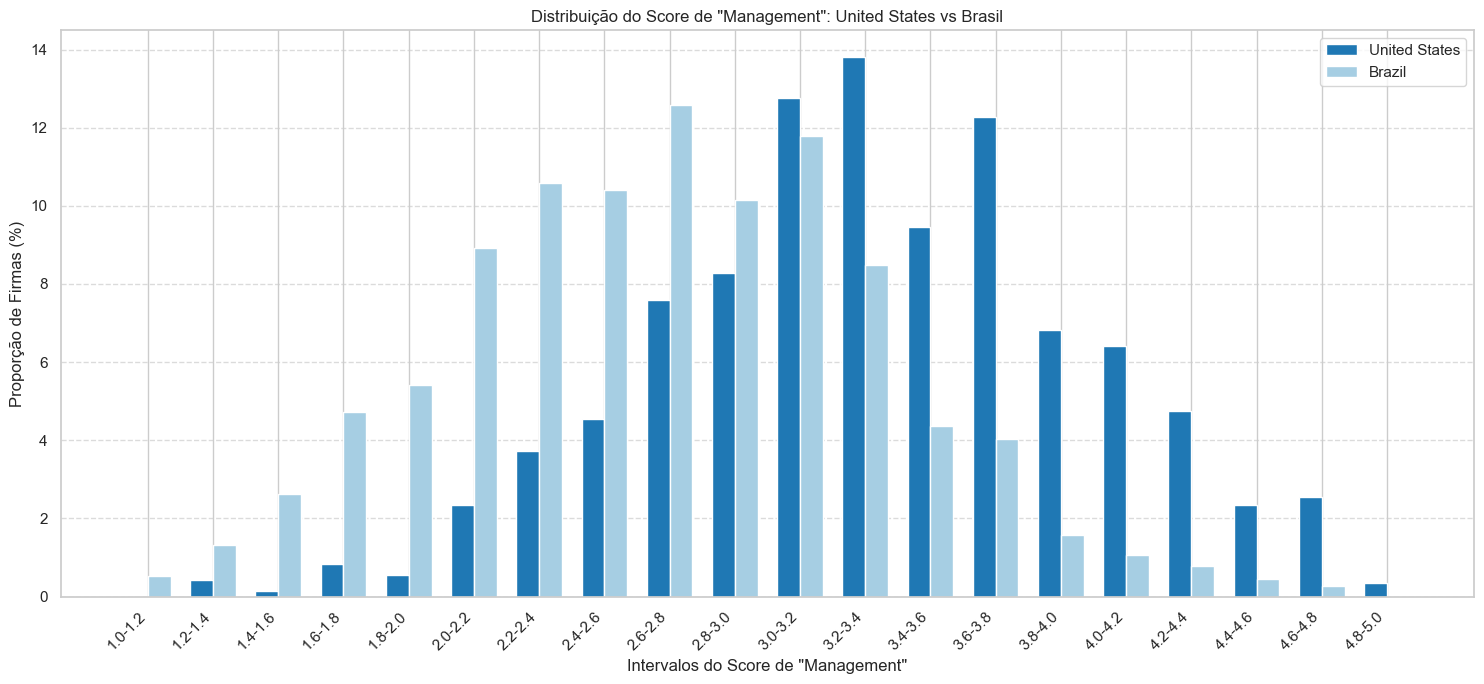

-----------------------------------


--- Comparação Gráfica: India vs Brasil ---
Gráfico comparativo salvo em: 'C:/Users/Inteli/Desktop/dist_management_India_vs_Brasil_passo7.png'


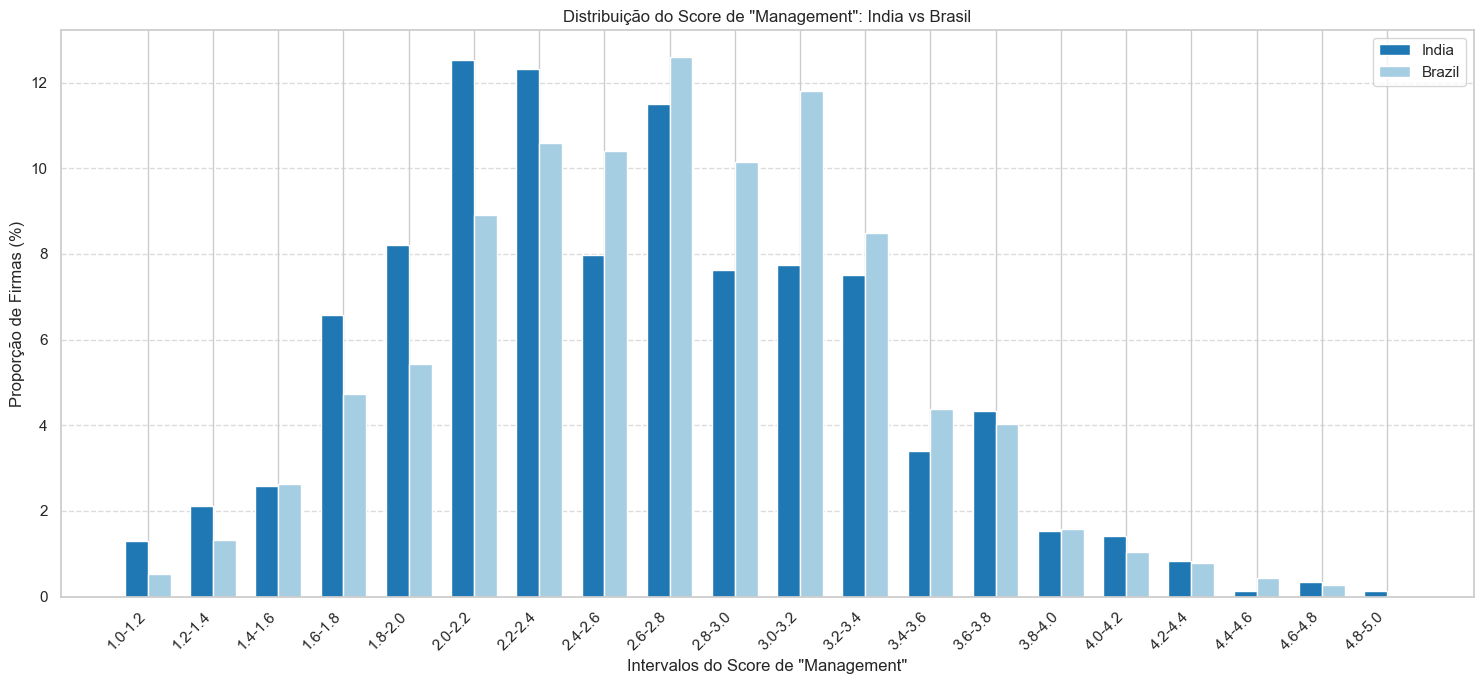

-----------------------------------


--- Comparação Gráfica: Italy vs Brasil ---
Gráfico comparativo salvo em: 'C:/Users/Inteli/Desktop/dist_management_Italy_vs_Brasil_passo7.png'


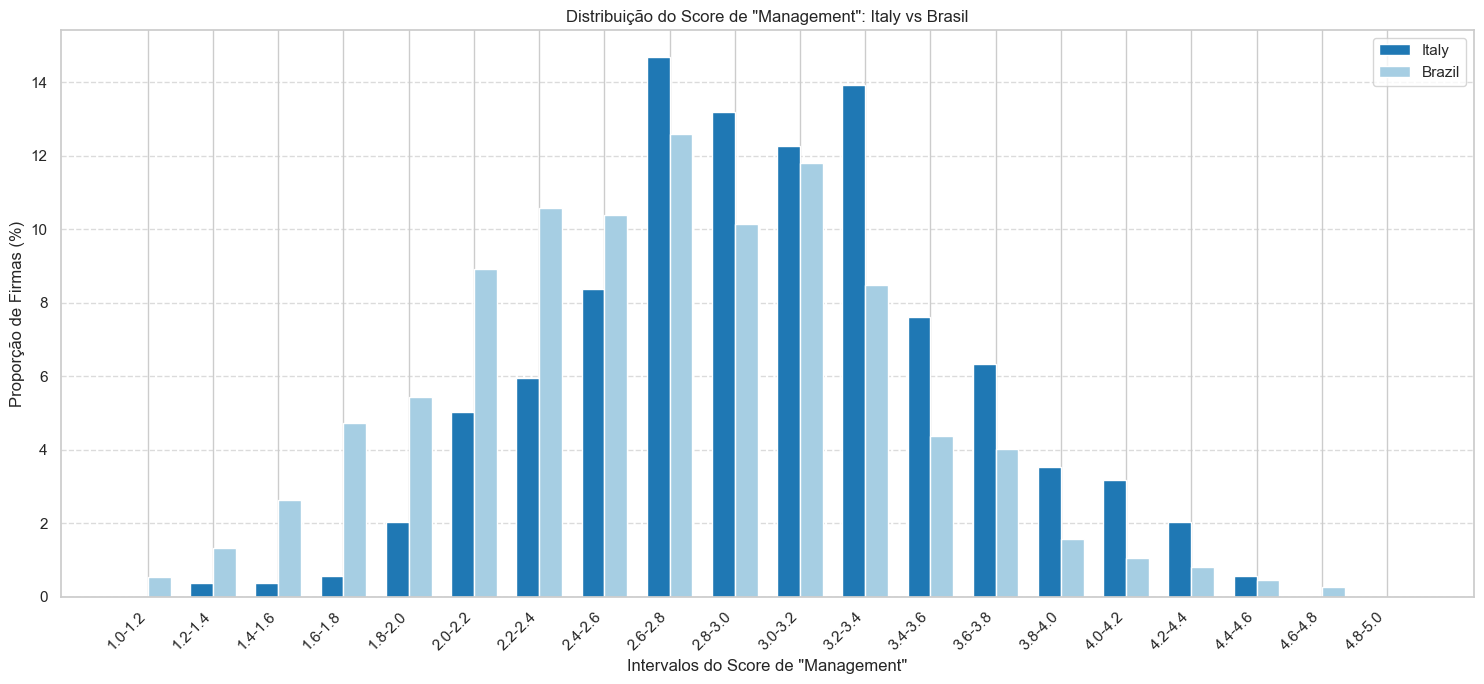

-----------------------------------


Arquivo Excel 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado. Abas incluídas/atualizadas: 7.

--- Processamento Concluído ---


In [15]:
#Passo 7:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para estilos de gráficos

# --- Configurações de Exibição e Estilo ---
pd.set_option('display.max_rows', 25) 
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 50)
sns.set_theme(style="whitegrid")

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
file_path_output_excel = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 
# Base para nomes de arquivos de gráficos do Passo 7 (os únicos a serem salvos)
file_path_grafico_base_passo7 = 'C:/Users/Inteli/Desktop/dist_management' 

# Nomes das abas
sheet_name_data_principal = 'wms_da_textbook'
sheet_name_dicionario = 'Sheet2'
sheet_name_dados_com_scores = 'Dados_com_Scores_Agregados'
sheet_name_media_pais = 'Media_Scores_Pais'
sheet_name_ranking_pais = 'Ranking_Scores_Pais'

# --- Passos 1 e 2 (Silenciosos): Carregamento e Limpeza Inicial ---
df_dicionario_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
except Exception: pass 

df_dados_limpos_wms = None
df_dados_wms = None
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy()
    else: 
        raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None

# --- Passo 3 (Silencioso): Criação de Scores Agregados ---
media_scores_pais_sorted = None 
ranking_scores_pais_sorted = None
tabelas_frequencia_dfs = {} 

if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    operations_cols = ['lean1', 'lean2']
    monitor_cols = ['perf1', 'perf2', 'perf3', 'perf4', 'perf5']
    target_cols = ['perf6', 'perf7', 'perf8', 'perf9', 'perf10']
    people_cols = ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']
    management_base_cols = operations_cols + monitor_cols + target_cols + people_cols

    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[operations_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[monitor_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[target_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[people_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    
    # --- Passo 4 (Silencioso): Análise de Scores por País e Rankings ---
    score_cols = ['operations', 'monitor', 'target', 'people', 'management']
    if 'country' in df_dados_limpos_wms.columns:
        media_scores_pais = df_dados_limpos_wms.groupby('country')[score_cols].mean()
        media_scores_pais_sorted = media_scores_pais.sort_values(by='management', ascending=False)
        ranking_scores_pais = media_scores_pais.rank(method='min', ascending=False)
        ranking_scores_pais.columns = [f'Rank_{col}' for col in ranking_scores_pais.columns]
        ranking_scores_pais_sorted = ranking_scores_pais.sort_values(by='Rank_management', ascending=True)

        # --- Passo 5 (Silencioso): Gráfico de Barras 'Management' por País ---
        if media_scores_pais_sorted is not None:
            plt.figure(figsize=(12, max(8, len(media_scores_pais_sorted) * 0.4) ))
            data_para_grafico_passo5 = media_scores_pais_sorted['management'].sort_values(ascending=True)
            bars_passo5 = plt.barh(data_para_grafico_passo5.index, data_para_grafico_passo5.values, color=sns.color_palette("viridis_r", len(data_para_grafico_passo5)))
            plt.xlabel('Score Médio de "Management"')
            plt.ylabel('País')
            plt.title('Score Médio de "Management" por País (Passo 5 - Não Salvo)') # Título alterado para clareza
            plt.tight_layout()
            for bar_p5 in bars_passo5: plt.text(bar_p5.get_width() + 0.01, bar_p5.get_y() + bar_p5.get_height()/2, f'{bar_p5.get_width():.2f}', va='center', ha='left', fontsize=8)
            # A linha abaixo para salvar o gráfico do Passo 5 foi COMENTADA conforme solicitado:
            # plt.savefig(f"{file_path_grafico_base_passo7}_geral_passo5.png", bbox_inches='tight') 
            plt.close() # Fecha a figura para não exibir e liberar memória

        # --- Passo 6 (Silencioso): Distribuição de Frequência do Score 'Management' ---
        paises_selecionados_passo6 = ["United States", "Brazil", "India", "Italy"]
        bins_passo6 = np.arange(1.0, 5.01, 0.2) 
        labels_passo6 = [f"{bins_passo6[i]:.1f}-{bins_passo6[i+1]:.1f}" for i in range(len(bins_passo6)-1)]
        
        for pais_p6 in paises_selecionados_passo6:
            df_pais_p6 = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais_p6]
            if df_pais_p6.empty or 'management' not in df_pais_p6.columns:
                tabelas_frequencia_dfs[pais_p6] = pd.DataFrame() 
                continue
            management_binned_p6 = pd.cut(df_pais_p6['management'], 
                                       bins=bins_passo6, labels=labels_passo6, 
                                       right=True, include_lowest=True, ordered=True)
            frequencia_p6 = management_binned_p6.value_counts(sort=False)
            proporcao_p6 = management_binned_p6.value_counts(normalize=True, sort=False) * 100
            tabela_distribuicao_p6 = pd.DataFrame({'Frequência': frequencia_p6, 'Proporção (%)': proporcao_p6.round(2)})
            tabela_distribuicao_p6 = tabela_distribuicao_p6.reindex(labels_passo6, fill_value=0)
            tabela_distribuicao_p6.loc['Total'] = [tabela_distribuicao_p6['Frequência'].sum(), tabela_distribuicao_p6['Proporção (%)'].sum().round(2)]
            tabelas_frequencia_dfs[pais_p6] = tabela_distribuicao_p6
        
        # --- Passo 7 (Saída Visível): Histogramas Comparativos com o Brasil ---
        print("\n--- 7. Histogramas Comparativos da Distribuição do Score 'Management' (vs Brasil) ---")
        paises_para_comparar_com_brasil = ["United States", "India", "Italy"]
        
        dist_brasil = tabelas_frequencia_dfs.get("Brazil")
        if dist_brasil is not None and not dist_brasil.empty:
            proporcao_brasil = dist_brasil['Proporção (%)'].drop('Total', errors='ignore') 
            
            for pais_comparar in paises_para_comparar_com_brasil:
                print(f"\n--- Comparação Gráfica: {pais_comparar} vs Brasil ---")
                dist_comparar = tabelas_frequencia_dfs.get(pais_comparar)

                if dist_comparar is not None and not dist_comparar.empty:
                    proporcao_comparar = dist_comparar['Proporção (%)'].drop('Total', errors='ignore')
                    df_plot = pd.DataFrame({ pais_comparar: proporcao_comparar, 'Brazil': proporcao_brasil })
                    df_plot = df_plot.reindex(labels_passo6).fillna(0)

                    plt.figure(figsize=(15, 7))
                    x_indices = np.arange(len(df_plot.index)) 
                    bar_width = 0.35  

                    plt.bar(x_indices - bar_width/2, df_plot[pais_comparar], bar_width, label=pais_comparar, color=sns.color_palette("Paired")[1])
                    plt.bar(x_indices + bar_width/2, df_plot['Brazil'], bar_width, label='Brazil', color=sns.color_palette("Paired")[0])

                    plt.ylabel('Proporção de Firmas (%)')
                    plt.xlabel('Intervalos do Score de "Management"')
                    plt.title(f'Distribuição do Score de "Management": {pais_comparar} vs Brasil')
                    plt.xticks(x_indices, df_plot.index, rotation=45, ha="right")
                    plt.legend()
                    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
                    plt.tight_layout()
                    
                    # Salva os gráficos comparativos do Passo 7
                    nome_arquivo_grafico_comp = f"{file_path_grafico_base_passo7}_{pais_comparar.replace(' ', '_')}_vs_Brasil_passo7.png"
                    try:
                        plt.savefig(nome_arquivo_grafico_comp, bbox_inches='tight')
                        print(f"Gráfico comparativo salvo em: '{nome_arquivo_grafico_comp}'")
                    except Exception as e_save_plot_comp:
                        print(f"ERRO ao salvar o gráfico comparativo para {pais_comparar}: {e_save_plot_comp}")
                    plt.show() 
                    print("-----------------------------------\n")
                else:
                    print(f"Dados de distribuição não disponíveis para {pais_comparar} para comparação.")
        else:
            print("ERRO: Dados de distribuição do Brasil não disponíveis para comparação.")

        # --- Salvando/Atualizando o Arquivo Excel com todas as abas ---
        excel_sheets_saved_or_updated = []
        try:
            with pd.ExcelWriter(file_path_output_excel, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                    df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False)
                    excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                if media_scores_pais_sorted is not None:
                    media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True)
                    excel_sheets_saved_or_updated.append(sheet_name_media_pais)
                if ranking_scores_pais_sorted is not None:
                    ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True)
                    excel_sheets_saved_or_updated.append(sheet_name_ranking_pais)
                for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs.items():
                    if not df_table_excel.empty:
                        sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                        df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True)
                        excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
        except FileNotFoundError: 
            try:
                with pd.ExcelWriter(file_path_output_excel, engine='openpyxl', mode='w') as writer:
                    if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                        df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False)
                        excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                    if media_scores_pais_sorted is not None:
                        media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True)
                        excel_sheets_saved_or_updated.append(sheet_name_media_pais)
                    if ranking_scores_pais_sorted is not None:
                        ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True)
                        excel_sheets_saved_or_updated.append(sheet_name_ranking_pais)
                    for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs.items():
                         if not df_table_excel.empty:
                            sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                            df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True)
                            excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
            except Exception as e_create_excel: print(f"ERRO ao CRIAR e salvar o arquivo Excel: {e_create_excel}")
        except Exception as e_save_excel: print(f"ERRO ao ATUALIZAR o arquivo Excel: {e_save_excel}")
        
        if excel_sheets_saved_or_updated: print(f"\nArquivo Excel '{file_path_output_excel}' salvo/atualizado. Abas incluídas/atualizadas: {len(excel_sheets_saved_or_updated)}.")
        else: print(f"\nNenhuma aba nova foi salva no arquivo Excel '{file_path_output_excel}'.")
    else: 
        print("ERRO: Coluna 'country' não encontrada. Análises subsequentes não podem ser realizadas.")
else: 
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")

print("\n--- Processamento Concluído ---")


--- 8. Boxplots Comparativos do Score 'Management' por País Selecionado ---
Gráfico de boxplot (Passo 8) salvo em: 'C:/Users/Inteli/Desktop/boxplots_management_scores_passo8.png'


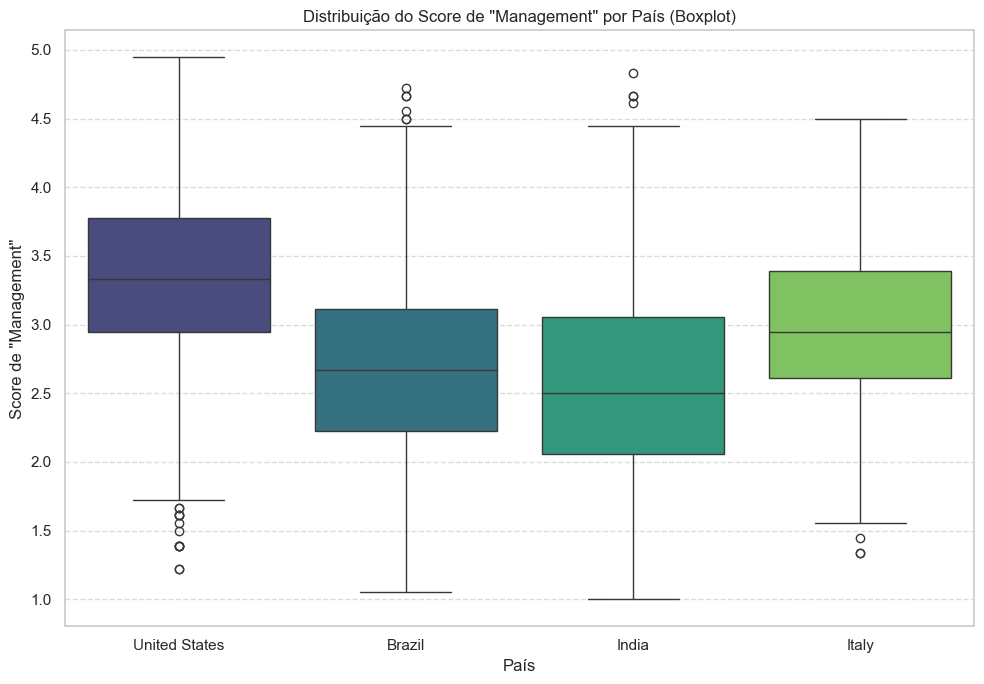

-----------------------------------


Arquivo Excel 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado. Abas incluídas/atualizadas: 7.

--- Processamento Concluído ---


In [18]:
# Passo 8:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para estilos de gráficos

# --- Configurações de Exibição e Estilo ---
pd.set_option('display.max_rows', 25) 
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 50)
sns.set_theme(style="whitegrid")

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
file_path_output_excel = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 
# Caminho apenas para o gráfico do Passo 8
file_path_output_boxplot_passo8 = 'C:/Users/Inteli/Desktop/boxplots_management_scores_passo8.png'
# Caminhos para gráficos dos Passos 5 e 7 (serão gerados em memória, mas não salvos em arquivo, exceto se descomentado)
# file_path_grafico_passo5 = 'C:/Users/Inteli/Desktop/management_scores_geral_passo5.png' 
# file_path_grafico_base_passo7 = 'C:/Users/Inteli/Desktop/dist_management' 


# Nomes das abas (mantidos para salvamento no Excel)
sheet_name_data_principal = 'wms_da_textbook'
sheet_name_dicionario = 'Sheet2'
sheet_name_dados_com_scores = 'Dados_com_Scores_Agregados'
sheet_name_media_pais = 'Media_Scores_Pais'
sheet_name_ranking_pais = 'Ranking_Scores_Pais'

# --- Passos 1 e 2 (Silenciosos): Carregamento e Limpeza Inicial ---
df_dicionario_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
except Exception: pass 

df_dados_limpos_wms = None
df_dados_wms = None
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy()
    else: 
        raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None

# --- Passos 3-7 (Lógica Executada Silenciosamente, Gráficos Intermediários Não Salvos em Disco) ---
media_scores_pais_sorted = None 
ranking_scores_pais_sorted = None
tabelas_frequencia_dfs = {} 

if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    # Passo 3: Criação de Scores (silencioso)
    operations_cols = ['lean1', 'lean2']; monitor_cols = ['perf1', 'perf2', 'perf3', 'perf4', 'perf5']
    target_cols = ['perf6', 'perf7', 'perf8', 'perf9', 'perf10']; people_cols = ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']
    management_base_cols = operations_cols + monitor_cols + target_cols + people_cols
    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[operations_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[monitor_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[target_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[people_cols].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    
    # Passo 4: Análise por País - Médias e Rankings (silencioso)
    score_cols = ['operations', 'monitor', 'target', 'people', 'management']
    if 'country' in df_dados_limpos_wms.columns:
        media_scores_pais = df_dados_limpos_wms.groupby('country')[score_cols].mean()
        media_scores_pais_sorted = media_scores_pais.sort_values(by='management', ascending=False)
        ranking_scores_pais = media_scores_pais.rank(method='min', ascending=False)
        ranking_scores_pais.columns = [f'Rank_{col}' for col in ranking_scores_pais.columns]
        ranking_scores_pais_sorted = ranking_scores_pais.sort_values(by='Rank_management', ascending=True)

        # Passo 5: Gráfico de Barras 'Management' por País (gerado em memória, mas não salvo nem exibido)
        if media_scores_pais_sorted is not None:
            plt.figure(figsize=(12, max(8, len(media_scores_pais_sorted) * 0.4) ))
            data_para_grafico_passo5 = media_scores_pais_sorted['management'].sort_values(ascending=True)
            bars_passo5 = plt.barh(data_para_grafico_passo5.index, data_para_grafico_passo5.values, color=sns.color_palette("viridis_r", len(data_para_grafico_passo5)))
            plt.xlabel('Score Médio de "Management"'); plt.ylabel('País'); plt.title('Score Médio de "Management" por País (Passo 5 - Não Salvo)')
            plt.tight_layout()
            for bar_p5 in bars_passo5: plt.text(bar_p5.get_width() + 0.01, bar_p5.get_y() + bar_p5.get_height()/2, f'{bar_p5.get_width():.2f}', va='center', ha='left', fontsize=8)
            # Linha de salvamento do gráfico do Passo 5 está comentada/removida.
            # plt.savefig(file_path_grafico_passo5, bbox_inches='tight') 
            plt.close() # Fecha a figura para não exibir e liberar memória

        # Passo 6: Distribuição de Frequência (dados preparados silenciosamente)
        paises_selecionados_passo6 = ["United States", "Brazil", "India", "Italy"]
        bins_passo6 = np.arange(1.0, 5.01, 0.2) 
        labels_passo6 = [f"{bins_passo6[i]:.1f}-{bins_passo6[i+1]:.1f}" for i in range(len(bins_passo6)-1)]
        for pais_p6 in paises_selecionados_passo6:
            df_pais_p6 = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais_p6]
            if df_pais_p6.empty or 'management' not in df_pais_p6.columns:
                tabelas_frequencia_dfs[pais_p6] = pd.DataFrame(); continue
            management_binned_p6 = pd.cut(df_pais_p6['management'], bins=bins_passo6, labels=labels_passo6, right=True, include_lowest=True, ordered=True)
            frequencia_p6 = management_binned_p6.value_counts(sort=False)
            proporcao_p6 = management_binned_p6.value_counts(normalize=True, sort=False) * 100
            tabela_distribuicao_p6 = pd.DataFrame({'Frequência': frequencia_p6, 'Proporção (%)': proporcao_p6.round(2)})
            tabela_distribuicao_p6 = tabela_distribuicao_p6.reindex(labels_passo6, fill_value=0)
            tabela_distribuicao_p6.loc['Total'] = [tabela_distribuicao_p6['Frequência'].sum(), tabela_distribuicao_p6['Proporção (%)'].sum().round(2)]
            tabelas_frequencia_dfs[pais_p6] = tabela_distribuicao_p6
        
        # Passo 7: Histogramas Comparativos (gerados em memória, mas não salvos nem exibidos)
        paises_para_comparar_com_brasil_p7 = ["United States", "India", "Italy"]
        dist_brasil_p7 = tabelas_frequencia_dfs.get("Brazil")
        if dist_brasil_p7 is not None and not dist_brasil_p7.empty:
            proporcao_brasil_p7 = dist_brasil_p7['Proporção (%)'].drop('Total', errors='ignore') 
            for pais_comparar_p7 in paises_para_comparar_com_brasil_p7:
                dist_comparar_p7 = tabelas_frequencia_dfs.get(pais_comparar_p7)
                if dist_comparar_p7 is not None and not dist_comparar_p7.empty:
                    proporcao_comparar_p7 = dist_comparar_p7['Proporção (%)'].drop('Total', errors='ignore')
                    df_plot_p7 = pd.DataFrame({ pais_comparar_p7: proporcao_comparar_p7, 'Brazil': proporcao_brasil_p7 })
                    df_plot_p7 = df_plot_p7.reindex(labels_passo6).fillna(0)
                    plt.figure(figsize=(15, 7))
                    x_indices_p7 = np.arange(len(df_plot_p7.index)); bar_width_p7 = 0.35  
                    plt.bar(x_indices_p7 - bar_width_p7/2, df_plot_p7[pais_comparar_p7], bar_width_p7, label=pais_comparar_p7, color=sns.color_palette("Paired")[1])
                    plt.bar(x_indices_p7 + bar_width_p7/2, df_plot_p7['Brazil'], bar_width_p7, label='Brazil', color=sns.color_palette("Paired")[0])
                    plt.ylabel('Proporção de Firmas (%)'); plt.xlabel('Intervalos do Score de "Management"')
                    plt.title(f'Distribuição do Score de "Management" (Passo 7 - Não Salvo): {pais_comparar_p7} vs Brasil')
                    plt.xticks(x_indices_p7, df_plot_p7.index, rotation=45, ha="right"); plt.legend(); plt.grid(True, axis='y', linestyle='--', alpha=0.7); plt.tight_layout()
                    # Linha de salvamento do gráfico do Passo 7 está comentada/removida.
                    # nome_arquivo_grafico_comp_p7 = f"{file_path_grafico_base_passo7}_{pais_comparar_p7.replace(' ', '_')}_vs_Brasil_passo7.png"
                    # plt.savefig(nome_arquivo_grafico_comp_p7, bbox_inches='tight')
                    plt.close() 
        
        # --- Passo 8 (Saída Visível): Boxplots Comparativos ---
        print("\n--- 8. Boxplots Comparativos do Score 'Management' por País Selecionado ---")
        paises_boxplot = ["United States", "Brazil", "India", "Italy"] 

        df_boxplot_data = df_dados_limpos_wms[df_dados_limpos_wms['country'].isin(paises_boxplot)]

        if not df_boxplot_data.empty and 'management' in df_boxplot_data.columns:
            plt.figure(figsize=(10, 7))
            sns.boxplot(x='country', y='management', data=df_boxplot_data, 
                        order=paises_boxplot, 
                        palette="viridis",
                        hue='country', 
                        legend=False) # Correção do FutureWarning e para não mostrar legenda de 'hue'
            plt.title('Distribuição do Score de "Management" por País (Boxplot)')
            plt.xlabel('País')
            plt.ylabel('Score de "Management"')
            plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
            plt.tight_layout()

            try: # Salva apenas o gráfico do Passo 8
                plt.savefig(file_path_output_boxplot_passo8, bbox_inches='tight')
                print(f"Gráfico de boxplot (Passo 8) salvo em: '{file_path_output_boxplot_passo8}'")
            except Exception as e_save_boxplot:
                print(f"ERRO ao salvar o gráfico de boxplot: {e_save_boxplot}")
            
            plt.show() # Exibe o gráfico de boxplot do Passo 8
        else:
            print("ERRO: Dados insuficientes ou coluna 'management' ausente para os países selecionados para o boxplot.")
        print("-----------------------------------\n")

        # --- Salvando/Atualizando o Arquivo Excel com todas as abas ---
        excel_sheets_saved_or_updated = []
        try:
            with pd.ExcelWriter(file_path_output_excel, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                    df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                if media_scores_pais_sorted is not None:
                    media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_media_pais)
                if ranking_scores_pais_sorted is not None:
                    ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_ranking_pais)
                for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs.items():
                    if not df_table_excel.empty:
                        sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                        df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True); excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
        except FileNotFoundError: 
            try: # Cria novo arquivo se não existir
                with pd.ExcelWriter(file_path_output_excel, engine='openpyxl', mode='w') as writer:
                    if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                        df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                    if media_scores_pais_sorted is not None:
                        media_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_media_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_media_pais)
                    if ranking_scores_pais_sorted is not None:
                        ranking_scores_pais_sorted.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_ranking_pais)
                    for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs.items():
                         if not df_table_excel.empty:
                            sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                            df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True); excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
            except Exception as e_create_excel: print(f"ERRO ao CRIAR e salvar o arquivo Excel: {e_create_excel}")
        except Exception as e_save_excel: print(f"ERRO ao ATUALIZAR o arquivo Excel: {e_save_excel}")
        
        if excel_sheets_saved_or_updated: print(f"\nArquivo Excel '{file_path_output_excel}' salvo/atualizado. Abas incluídas/atualizadas: {len(excel_sheets_saved_or_updated)}.")
        else: print(f"\nNenhuma aba foi salva no arquivo Excel '{file_path_output_excel}'.")
    else: 
        print("ERRO: Coluna 'country' não encontrada. Análises subsequentes não podem ser realizadas.")
else: 
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")

print("\n--- Processamento Concluído ---")

In [38]:
#Passo 9:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para estilos de gráficos
from scipy import stats # Para calcular o intervalo de confiança com a distribuição t

# --- Configurações de Exibição e Estilo ---
pd.set_option('display.max_rows', 25) 
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 50)
sns.set_theme(style="whitegrid")

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
# Arquivo Excel consolidado que receberá todas as abas
file_path_output_excel_consolidado = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 
# Caminho para o gráfico do Passo 8 (não será mais salvo, mas a variável pode ser mantida comentada)
# file_path_output_boxplot_passo8 = 'C:/Users/Inteli/Desktop/boxplots_management_scores_passo8.png'

# Nomes das abas para o arquivo consolidado
sheet_name_data_principal = 'wms_da_textbook' 
sheet_name_dicionario = 'Sheet2' 
sheet_name_dados_com_scores = 'Dados_com_Scores_Agregados'
sheet_name_media_pais = 'Media_Scores_Pais'
sheet_name_ranking_pais = 'Ranking_Scores_Pais'
sheet_name_stats_ic_pais = 'Stats_IC_Management_Pais' 

# --- Passos 1 e 2 (Silenciosos): Carregamento e Limpeza Inicial ---
df_dicionario_wms = None; df_dados_limpos_wms = None; df_dados_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name=sheet_name_dicionario)
except Exception: pass 
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy()
    else: raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None

# --- Passos 3-8 (Lógica Executada Silenciosamente, Gráficos NÃO Salvos em Disco) ---
media_scores_pais_sorted_p4 = None 
ranking_scores_pais_sorted_p4 = None
tabelas_frequencia_dfs_p6 = {} 
df_stats_ic_paises_p9 = pd.DataFrame() 

if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    # Passo 3: Criação de Scores (silencioso)
    cols_p3 = {'ops': ['lean1', 'lean2'], 'mon': ['perf1', 'perf2', 'perf3', 'perf4', 'perf5'],
               'tgt': ['perf6', 'perf7', 'perf8', 'perf9', 'perf10'], 
               'ppl': ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']}
    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[cols_p3['ops']].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[cols_p3['mon']].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[cols_p3['tgt']].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[cols_p3['ppl']].mean(axis=1)
    management_base_cols = cols_p3['ops'] + cols_p3['mon'] + cols_p3['tgt'] + cols_p3['ppl']
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    
    # Passo 4: Análise por País - Médias e Rankings (silencioso)
    score_cols_p4 = ['operations', 'monitor', 'target', 'people', 'management']
    if 'country' in df_dados_limpos_wms.columns:
        media_scores_pais_p4 = df_dados_limpos_wms.groupby('country')[score_cols_p4].mean()
        media_scores_pais_sorted_p4 = media_scores_pais_p4.sort_values(by='management', ascending=False)
        ranking_scores_pais_p4 = media_scores_pais_p4.rank(method='min', ascending=False)
        ranking_scores_pais_p4.columns = [f'Rank_{col}' for col in ranking_scores_pais_p4.columns]
        ranking_scores_pais_sorted_p4 = ranking_scores_pais_p4.sort_values(by='Rank_management', ascending=True)

        # Passo 5: Gráfico de Barras 'Management' por País (NÃO SALVO, apenas gerado em memória e fechado)
        if media_scores_pais_sorted_p4 is not None:
            plt.figure(figsize=(12, max(8, len(media_scores_pais_sorted_p4) * 0.4)))
            # ... (código do gráfico aqui, mas sem savefig e sem show) ...
            plt.close() 

        # Passo 6: Distribuição de Frequência (dados preparados silenciosamente)
        paises_p6 = ["United States", "Brazil", "India", "Italy"]
        bins_p6 = np.arange(1.0, 5.01, 0.2); labels_p6 = [f"{bins_p6[i]:.1f}-{bins_p6[i+1]:.1f}" for i in range(len(bins_p6)-1)]
        for pais_p6_loop in paises_p6:
            df_pais_p6 = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais_p6_loop]
            if df_pais_p6.empty or 'management' not in df_pais_p6.columns: tabelas_frequencia_dfs_p6[pais_p6_loop] = pd.DataFrame(); continue
            mgmt_binned_p6 = pd.cut(df_pais_p6['management'], bins=bins_p6, labels=labels_p6, right=True, include_lowest=True, ordered=True)
            freq_p6 = mgmt_binned_p6.value_counts(sort=False); prop_p6 = mgmt_binned_p6.value_counts(normalize=True, sort=False) * 100
            tab_dist_p6 = pd.DataFrame({'Frequência': freq_p6, 'Proporção (%)': prop_p6.round(2)})
            tab_dist_p6 = tab_dist_p6.reindex(labels_p6, fill_value=0)
            tab_dist_p6.loc['Total'] = [tab_dist_p6['Frequência'].sum(), tab_dist_p6['Proporção (%)'].sum().round(2)]
            tabelas_frequencia_dfs_p6[pais_p6_loop] = tab_dist_p6
        
        # Passo 7: Histogramas Comparativos (NÃO SALVOS, apenas gerados em memória e fechados)
        paises_comp_p7 = ["United States", "India", "Italy"]; dist_br_p7 = tabelas_frequencia_dfs_p6.get("Brazil")
        if dist_br_p7 is not None and not dist_br_p7.empty:
            for pais_comp_p7_loop in paises_comp_p7:
                dist_comp_p7 = tabelas_frequencia_dfs_p6.get(pais_comp_p7_loop)
                if dist_comp_p7 is not None and not dist_comp_p7.empty:
                    plt.figure(figsize=(15,7)); 
                    plt.close() 
        
        # Passo 8: Boxplots Comparativos (NÃO SALVO, apenas gerado em memória e fechado)
        paises_boxplot_p8 = ["United States", "Brazil", "India", "Italy"]
        df_boxplot_data_p8 = df_dados_limpos_wms[df_dados_limpos_wms['country'].isin(paises_boxplot_p8)]
        if not df_boxplot_data_p8.empty and 'management' in df_boxplot_data_p8.columns:
            plt.figure(figsize=(10, 7))
            sns.boxplot(x='country', y='management', data=df_boxplot_data_p8, order=paises_boxplot_p8, palette="viridis", hue='country', legend=False)
            plt.title('Distribuição (P8 - Não Salvo): "Management" por País'); plt.xlabel('País'); plt.ylabel('Score de "Management"')
            plt.grid(True, axis='y', linestyle='--', alpha=0.7); plt.tight_layout()
            # Linha de salvamento do gráfico do Passo 8 REMOVIDA/COMENTADA
            # try: plt.savefig(file_path_output_boxplot_passo8, bbox_inches='tight')
            # except Exception: pass 
            plt.close() # Fecha a figura após gerar em memória

        # --- Passo 9 (Saída Visível): Tabela de Estatísticas com Intervalo de Confiança ---
        print("\n--- 9. Estatísticas do Score 'Management' por País (com Intervalo de Confiança 95%) ---")
        paises_selecionados_passo9 = ["United States", "Brazil", "India", "Italy"]
        lista_stats_paises = []

        for pais_p9 in paises_selecionados_passo9:
            df_pais_p9 = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais_p9]
            stats_dict = {'País': pais_p9, 'Média': np.nan, 'Desvio Padrão': np.nan, 
                          'N (firmas)': 0, 'IC 95% Inferior': np.nan, 'IC 95% Superior': np.nan,
                          'IC 95% (texto)': "Dados insuficientes"}
            
            if not df_pais_p9.empty and 'management' in df_pais_p9.columns and not df_pais_p9['management'].isnull().all():
                management_scores_p9 = df_pais_p9['management'].dropna()
                if len(management_scores_p9) >= 2:
                    media_p9 = management_scores_p9.mean(); std_dev_p9 = management_scores_p9.std(); n_p9 = len(management_scores_p9)
                    ic_p9 = stats.t.interval(0.95, n_p9 - 1, loc=media_p9, scale=stats.sem(management_scores_p9))
                    stats_dict.update({'Média': round(media_p9, 3), 'Desvio Padrão': round(std_dev_p9, 3),
                                       'N (firmas)': n_p9, 'IC 95% Inferior': round(ic_p9[0], 3), 
                                       'IC 95% Superior': round(ic_p9[1], 3),
                                       'IC 95% (texto)': f"[{round(ic_p9[0], 3)}, {round(ic_p9[1], 3)}]"})
                elif len(management_scores_p9) == 1:
                     stats_dict.update({'Média': round(management_scores_p9.mean(),3), 'N (firmas)': 1, 'IC 95% (texto)': "N < 2"})
            lista_stats_paises.append(stats_dict)

        df_stats_ic_paises_p9 = pd.DataFrame(lista_stats_paises)
        if not df_stats_ic_paises_p9.empty:
             df_stats_ic_paises_p9 = df_stats_ic_paises_p9.set_index('País')

        print("\nVersão em texto da Tabela de Estatísticas (Passo 9):\n")
        print(df_stats_ic_paises_p9.to_string())
        print("\nVersão HTML da Tabela de Estatísticas (Passo 9 - renderizada no Jupyter):\n")
        display(HTML(df_stats_ic_paises_p9.to_html(notebook=True, border=1)))
        print("-----------------------------------\n")
            
        # --- Salvando/Atualizando o Arquivo Excel CONSOLIDADO com todas as abas ---
        # A tabela do Passo 9 será adicionada como uma nova aba neste arquivo.
        
        excel_sheets_saved_or_updated = []
        print(f"\n--- Salvando/Atualizando Resultados no Arquivo Excel Consolidado: {file_path_output_excel_consolidado} ---")
        try:
            with pd.ExcelWriter(file_path_output_excel_consolidado, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                    df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                if media_scores_pais_sorted_p4 is not None:
                    media_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_media_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_media_pais)
                if ranking_scores_pais_sorted_p4 is not None:
                    ranking_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_ranking_pais)
                for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs_p6.items(): 
                    if not df_table_excel.empty:
                        sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                        df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True); excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
                if not df_stats_ic_paises_p9.empty: 
                    df_stats_ic_paises_p9.to_excel(writer, sheet_name=sheet_name_stats_ic_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_stats_ic_pais)
        except FileNotFoundError: 
            try: 
                with pd.ExcelWriter(file_path_output_excel_consolidado, engine='openpyxl', mode='w') as writer:
                    if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                        df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                    if media_scores_pais_sorted_p4 is not None:
                        media_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_media_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_media_pais)
                    if ranking_scores_pais_sorted_p4 is not None:
                        ranking_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_ranking_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_ranking_pais)
                    for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs_p6.items():
                         if not df_table_excel.empty:
                            sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                            df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True); excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
                    if not df_stats_ic_paises_p9.empty:
                        df_stats_ic_paises_p9.to_excel(writer, sheet_name=sheet_name_stats_ic_pais, index=True); excel_sheets_saved_or_updated.append(sheet_name_stats_ic_pais)
            except Exception as e_create_excel: print(f"ERRO ao CRIAR e salvar o arquivo Excel consolidado: {e_create_excel}")
        except Exception as e_save_excel: print(f"ERRO ao ATUALIZAR o arquivo Excel consolidado: {e_save_excel}")
        
        if excel_sheets_saved_or_updated: print(f"\nArquivo Excel consolidado '{file_path_output_excel_consolidado}' salvo/atualizado. Abas incluídas/atualizadas: {len(excel_sheets_saved_or_updated)}.")
        else: print(f"\nNenhuma aba foi salva no arquivo Excel consolidado '{file_path_output_excel_consolidado}'.")
    else: 
        print("ERRO: Coluna 'country' não encontrada. Análises subsequentes não podem ser realizadas.")
else: 
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")

print("\n--- Processamento Concluído ---")


--- 9. Estatísticas do Score 'Management' por País (com Intervalo de Confiança 95%) ---

Versão em texto da Tabela de Estatísticas (Passo 9):

               Média  Desvio Padrão  N (firmas)  IC 95% Inferior  IC 95% Superior  IC 95% (texto)
País                                                                                             
United States  3.335          0.648        1449            3.302            3.369  [3.302, 3.369]
Brazil         2.681          0.645        1144            2.643            2.718  [2.643, 2.718]
India          2.569          0.696         853            2.522            2.616  [2.522, 2.616]
Italy          3.003          0.575         538            2.954            3.051  [2.954, 3.051]

Versão HTML da Tabela de Estatísticas (Passo 9 - renderizada no Jupyter):



,Média,Desvio Padrão,N (firmas),IC 95% Inferior,IC 95% Superior,IC 95% (texto)
País,,,,,,
United States,3.335,0.648,1449,3.302,3.369,"[3.302, 3.369]"
Brazil,2.681,0.645,1144,2.643,2.718,"[2.643, 2.718]"
India,2.569,0.696,853,2.522,2.616,"[2.522, 2.616]"
Italy,3.003,0.575,538,2.954,3.051,"[2.954, 3.051]"


-----------------------------------


--- Salvando/Atualizando Resultados no Arquivo Excel Consolidado: C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx ---

Arquivo Excel consolidado 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado. Abas incluídas/atualizadas: 8.

--- Processamento Concluído ---



--- 10. Gráficos de Coluna: Média e IC 95% das Dimensões de Gestão por País ---

--- Gráfico para Dimensão: Management ---
Gráfico para 'management' salvo em: 'C:/Users/Inteli/Desktop/mean_score_ci_management.png'


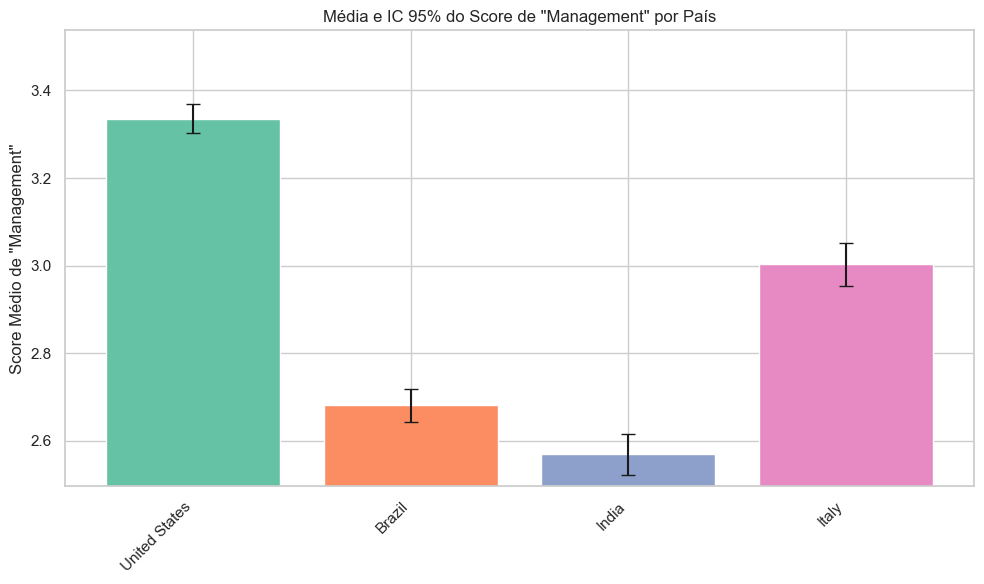

-----------------------------------


--- Gráfico para Dimensão: Operations ---
Gráfico para 'operations' salvo em: 'C:/Users/Inteli/Desktop/mean_score_ci_operations.png'


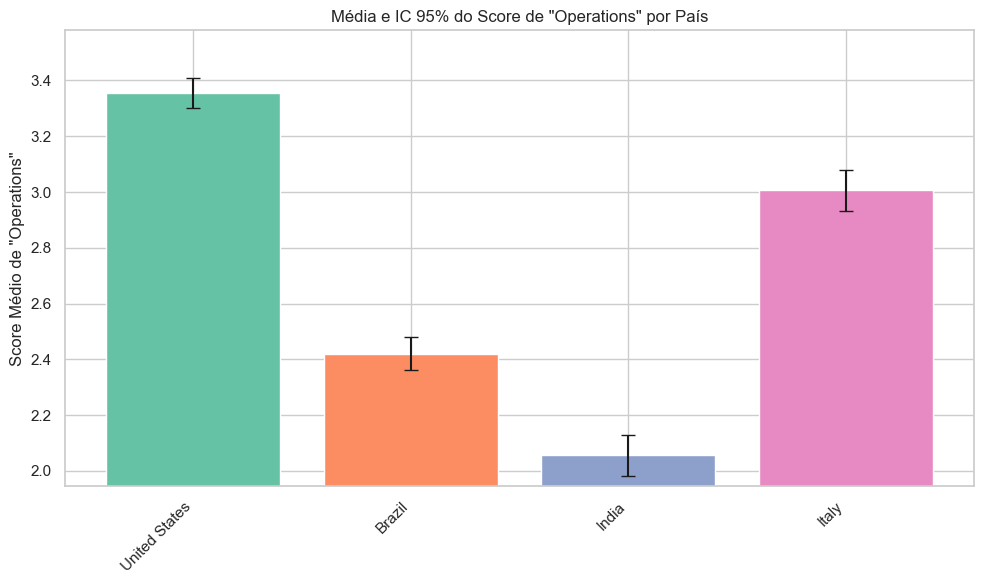

-----------------------------------


--- Gráfico para Dimensão: Monitor ---
Gráfico para 'monitor' salvo em: 'C:/Users/Inteli/Desktop/mean_score_ci_monitor.png'


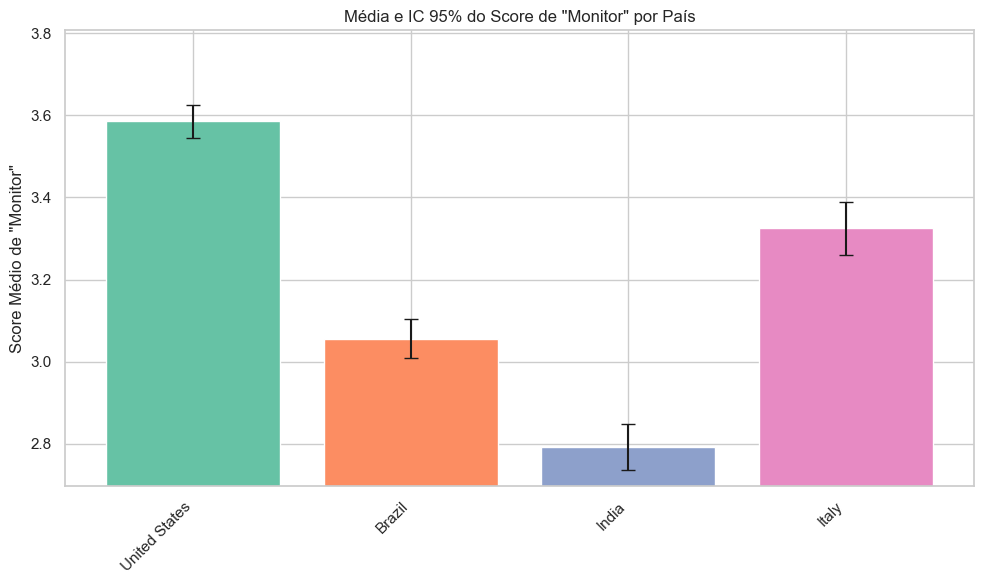

-----------------------------------


--- Gráfico para Dimensão: People ---
Gráfico para 'people' salvo em: 'C:/Users/Inteli/Desktop/mean_score_ci_people.png'


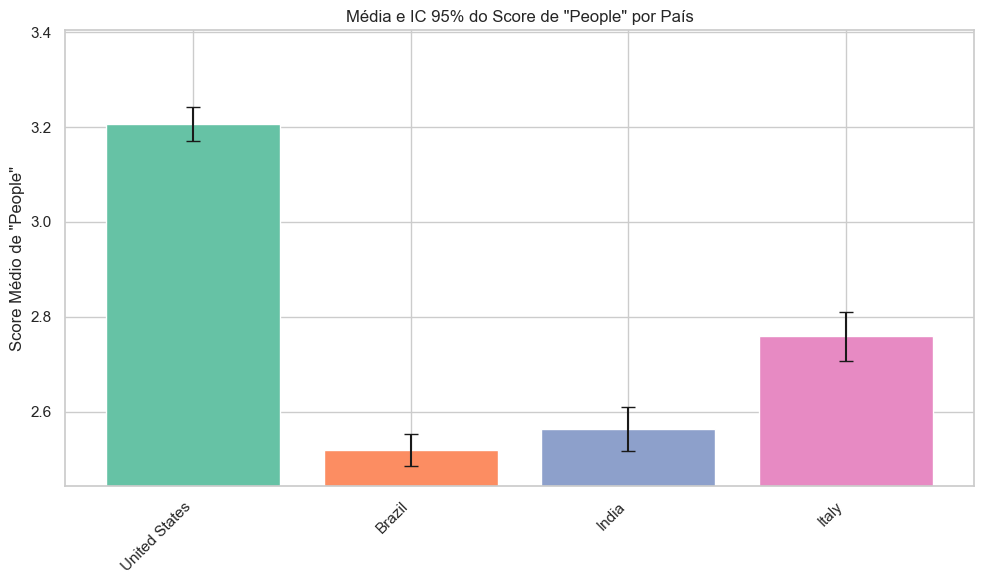

-----------------------------------


--- Gráfico para Dimensão: Target ---
Gráfico para 'target' salvo em: 'C:/Users/Inteli/Desktop/mean_score_ci_target.png'


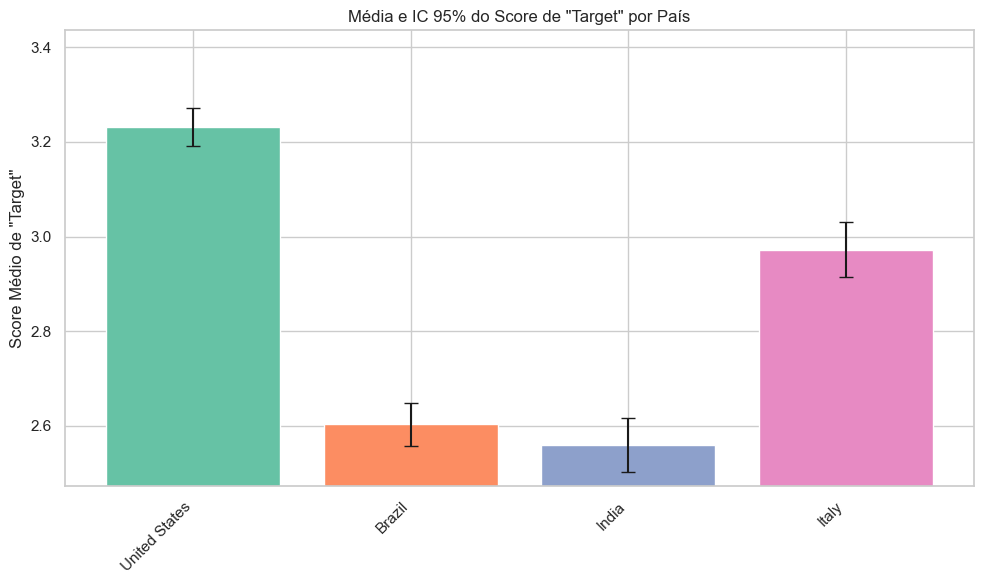

-----------------------------------


--- Tabela de Dados para Gráficos do Passo 10 (Média, Std, N, IC) ---



,País,Dimensão,Média,Desvio Padrão,N (firmas),IC 95% Inferior,IC 95% Superior
0,United States,management,3.335250,0.648190,1449,3.301848,3.368653
1,Brazil,management,2.680798,0.645183,1144,2.643372,2.718225
2,India,management,2.569168,0.696166,853,2.522383,2.615952
3,Italy,management,3.002685,0.574790,538,2.954005,3.051364
4,United States,operations,3.354727,1.051561,1449,3.300538,3.408916
5,Brazil,operations,2.420455,1.014230,1144,2.361620,2.479289
6,India,operations,2.055686,1.073368,853,1.983552,2.127820
7,Italy,operations,3.005576,0.872168,538,2.931712,3.079441
8,United States,monitor,3.585369,0.780074,1449,3.545170,3.625568
9,Brazil,monitor,3.056294,0.806131,1144,3.009531,3.103057



--- Salvando/Atualizando Resultados no Arquivo Excel Consolidado: C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx ---

Arquivo Excel consolidado 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado. Abas incluídas/atualizadas: 9.

--- Processamento Concluído ---


In [28]:
# Passo 10:

import pandas as pd
import numpy as np
from IPython.display import HTML, display # Para exibir DataFrames como HTML no Jupyter
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para estilos de gráficos
from scipy import stats # Para calcular o intervalo de confiança com a distribuição t

# --- Configurações de Exibição e Estilo ---
pd.set_option('display.max_rows', 25) 
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 50)
sns.set_theme(style="whitegrid")

# --- Caminhos dos Arquivos ---
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx'
file_path_output_excel_consolidado = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 
# Base para nomes de arquivos de gráficos do Passo 10
file_path_grafico_base_passo10 = 'C:/Users/Inteli/Desktop/mean_score_ci' 

# Nomes das abas
sheet_name_dados_com_scores = 'Dados_com_Scores_Agregados'
sheet_name_media_pais_p4 = 'Media_Scores_Pais_P4' # Renomeado para clareza
sheet_name_ranking_pais_p4 = 'Ranking_Scores_Pais_P4' # Renomeado para clareza
sheet_name_stats_ic_management_p9 = 'Stats_IC_Management_P9' # Renomeado para clareza
sheet_name_stats_ic_dimensoes_p10 = 'Stats_IC_Dimensoes_P10' # Nova aba para dados do Passo 10

# --- Passos 1 e 2 (Silenciosos): Carregamento e Limpeza Inicial ---
df_dicionario_wms = None; df_dados_limpos_wms = None; df_dados_wms = None
try:
    df_dicionario_wms = pd.read_excel(file_path_dicionario_variaveis_wms, sheet_name='Sheet2')
except Exception: pass 
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name='wms_da_textbook', na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None:
        df_dados_limpos_wms = df_dados_wms.copy()
    else: raise ValueError("Falha ao carregar o dataset principal.")
except Exception as e_load_clean:
    print(f"ERRO CRÍTICO durante o carregamento/limpeza silenciosa dos dados: {e_load_clean}")
    df_dados_limpos_wms = None

# --- Passos 3-9 (Lógica Executada Silenciosamente, Gráficos NÃO Salvos/Exibidos) ---
media_scores_pais_sorted_p4 = None 
ranking_scores_pais_sorted_p4 = None
tabelas_frequencia_dfs_p6 = {} 
df_stats_ic_management_p9 = pd.DataFrame() # Tabela do Passo 9 (para 'management' apenas)

if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    # Passo 3: Criação de Scores (silencioso)
    cols_p3 = {'ops': ['lean1', 'lean2'], 'mon': ['perf1', 'perf2', 'perf3', 'perf4', 'perf5'],
               'tgt': ['perf6', 'perf7', 'perf8', 'perf9', 'perf10'], 
               'ppl': ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']}
    df_dados_limpos_wms.loc[:, 'operations'] = df_dados_limpos_wms[cols_p3['ops']].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'monitor'] = df_dados_limpos_wms[cols_p3['mon']].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'target'] = df_dados_limpos_wms[cols_p3['tgt']].mean(axis=1)
    df_dados_limpos_wms.loc[:, 'people'] = df_dados_limpos_wms[cols_p3['ppl']].mean(axis=1)
    management_base_cols = cols_p3['ops'] + cols_p3['mon'] + cols_p3['tgt'] + cols_p3['ppl']
    df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols].mean(axis=1)
    
    # Passo 4: Análise por País - Médias e Rankings (silencioso)
    score_cols_p4 = ['operations', 'monitor', 'target', 'people', 'management']
    if 'country' in df_dados_limpos_wms.columns:
        media_scores_pais_p4 = df_dados_limpos_wms.groupby('country')[score_cols_p4].mean()
        media_scores_pais_sorted_p4 = media_scores_pais_p4.sort_values(by='management', ascending=False)
        ranking_scores_pais_p4 = media_scores_pais_p4.rank(method='min', ascending=False)
        ranking_scores_pais_p4.columns = [f'Rank_{col}' for col in ranking_scores_pais_p4.columns]
        ranking_scores_pais_sorted_p4 = ranking_scores_pais_p4.sort_values(by='Rank_management', ascending=True)

        # Passos 5, 7, 8: Gráficos gerados em memória, mas NÃO SALVOS em arquivo nem exibidos
        if media_scores_pais_sorted_p4 is not None: plt.figure(); plt.close() # Simula criação e fechamento
        paises_p6 = ["United States", "Brazil", "India", "Italy"]
        bins_p6 = np.arange(1.0, 5.01, 0.2); labels_p6 = [f"{bins_p6[i]:.1f}-{bins_p6[i+1]:.1f}" for i in range(len(bins_p6)-1)]
        for pais_p6_loop in paises_p6: # Prepara dados para tabelas_frequencia_dfs_p6
            df_pais_p6 = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais_p6_loop]
            if df_pais_p6.empty or 'management' not in df_pais_p6.columns: tabelas_frequencia_dfs_p6[pais_p6_loop] = pd.DataFrame(); continue
            mgmt_binned_p6 = pd.cut(df_pais_p6['management'], bins=bins_p6, labels=labels_p6, right=True, include_lowest=True, ordered=True)
            freq_p6 = mgmt_binned_p6.value_counts(sort=False); prop_p6 = mgmt_binned_p6.value_counts(normalize=True, sort=False) * 100
            tab_dist_p6 = pd.DataFrame({'Frequência': freq_p6, 'Proporção (%)': prop_p6.round(2)})
            tab_dist_p6 = tab_dist_p6.reindex(labels_p6, fill_value=0)
            tab_dist_p6.loc['Total'] = [tab_dist_p6['Frequência'].sum(), tab_dist_p6['Proporção (%)'].sum().round(2)]
            tabelas_frequencia_dfs_p6[pais_p6_loop] = tab_dist_p6
        
        paises_comp_p7 = ["United States", "India", "Italy"]; # Lógica do Passo 7 (gráficos não salvos)
        if tabelas_frequencia_dfs_p6.get("Brazil") is not None: plt.figure(); plt.close() 
        
        paises_boxplot_p8 = ["United States", "Brazil", "India", "Italy"] # Lógica do Passo 8 (gráfico não salvo)
        df_boxplot_data_p8 = df_dados_limpos_wms[df_dados_limpos_wms['country'].isin(paises_boxplot_p8)]
        if not df_boxplot_data_p8.empty: plt.figure(); plt.close()

        # Passo 9: Tabela de Estatísticas com IC para 'management' (preparada silenciosamente para Excel)
        paises_p9 = ["United States", "Brazil", "India", "Italy"]; lista_stats_p9 = []
        for pais_p9_loop in paises_p9:
            df_pais_p9 = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais_p9_loop]
            stats_dict_p9 = {'País': pais_p9_loop, 'Média':np.nan, 'Desvio Padrão':np.nan, 'N (firmas)':0, 'IC 95% Inferior':np.nan, 'IC 95% Superior':np.nan}
            if not df_pais_p9.empty and 'management' in df_pais_p9.columns and not df_pais_p9['management'].isnull().all():
                mgmt_scores_p9 = df_pais_p9['management'].dropna()
                if len(mgmt_scores_p9) >= 2:
                    media_p9=mgmt_scores_p9.mean(); std_p9=mgmt_scores_p9.std(); n_p9=len(mgmt_scores_p9)
                    ic_p9 = stats.t.interval(0.95, n_p9-1, loc=media_p9, scale=stats.sem(mgmt_scores_p9))
                    stats_dict_p9.update({'Média':media_p9, 'Desvio Padrão':std_p9, 'N (firmas)':n_p9, 'IC 95% Inferior':ic_p9[0], 'IC 95% Superior':ic_p9[1]})
                elif len(mgmt_scores_p9) == 1: stats_dict_p9.update({'Média':mgmt_scores_p9.mean(), 'N (firmas)':1})
            lista_stats_p9.append(stats_dict_p9)
        df_stats_ic_management_p9 = pd.DataFrame(lista_stats_p9)
        if not df_stats_ic_management_p9.empty: df_stats_ic_management_p9 = df_stats_ic_management_p9.set_index('País')


        # --- Passo 10 (Saída Visível): Gráficos de Coluna com Média e IC para cada Dimensão de Gestão ---
        print("\n--- 10. Gráficos de Coluna: Média e IC 95% das Dimensões de Gestão por País ---")
        paises_selecionados_passo10 = ["United States", "Brazil", "India", "Italy"]
        dimensoes_gestao_passo10 = ['management', 'operations', 'monitor', 'people', 'target']
        
        # Coletar dados para a tabela do Excel do Passo 10
        lista_stats_dimensoes_p10 = []

        for dimensao in dimensoes_gestao_passo10:
            print(f"\n--- Gráfico para Dimensão: {dimensao.capitalize()} ---")
            means = []
            conf_intervals_lower = []
            conf_intervals_upper = []
            margins_of_error = [] # yerr para plt.bar

            for pais in paises_selecionados_passo10:
                df_pais_dim = df_dados_limpos_wms[df_dados_limpos_wms['country'] == pais]
                
                country_stats = {'País': pais, 'Dimensão': dimensao, 'Média': np.nan, 
                                 'Desvio Padrão': np.nan, 'N (firmas)': 0, 
                                 'IC 95% Inferior': np.nan, 'IC 95% Superior': np.nan}

                if not df_pais_dim.empty and dimensao in df_pais_dim.columns and not df_pais_dim[dimensao].isnull().all():
                    scores_dim = df_pais_dim[dimensao].dropna()
                    if len(scores_dim) >= 2:
                        media = scores_dim.mean()
                        std_dev = scores_dim.std()
                        n = len(scores_dim)
                        sem = stats.sem(scores_dim) # Erro padrão da média
                        
                        # Margem de erro para o IC 95%
                        # t_critico * sem
                        margin_error = sem * stats.t.ppf((1 + 0.95) / 2., n - 1)
                        
                        means.append(media)
                        margins_of_error.append(margin_error)
                        ic_lower, ic_upper = stats.t.interval(0.95, n-1, loc=media, scale=sem)
                        
                        country_stats.update({'Média': media, 'Desvio Padrão': std_dev, 'N (firmas)': n,
                                              'IC 95% Inferior': ic_lower, 'IC 95% Superior': ic_upper})
                    else: # N < 2
                        means.append(scores_dim.mean() if len(scores_dim) == 1 else np.nan)
                        margins_of_error.append(np.nan)
                        country_stats.update({'Média': scores_dim.mean() if len(scores_dim) == 1 else np.nan, 'N (firmas)': len(scores_dim)})
                else: # País não tem dados para a dimensão
                    means.append(np.nan)
                    margins_of_error.append(np.nan)
                lista_stats_dimensoes_p10.append(country_stats)
            
            # Criação do gráfico de colunas com barras de erro
            if any(not np.isnan(m) for m in means): # Procede apenas se houver alguma média válida
                plt.figure(figsize=(10, 6))
                x_pos = np.arange(len(paises_selecionados_passo10))
                # Filtra NaNs para yerr, substituindo por 0 para não quebrar o plot, ou omitindo a barra
                valid_indices = [i for i, m in enumerate(means) if not np.isnan(m)]
                valid_paises = [paises_selecionados_passo10[i] for i in valid_indices]
                valid_means = [means[i] for i in valid_indices]
                valid_yerr = [margins_of_error[i] if not np.isnan(margins_of_error[i]) else 0 for i in valid_indices]

                plt.bar(valid_paises, valid_means, yerr=valid_yerr, capsize=5, color=sns.color_palette("Set2", len(valid_paises)))
                plt.ylabel(f'Score Médio de "{dimensao.capitalize()}"')
                plt.title(f'Média e IC 95% do Score de "{dimensao.capitalize()}" por País')
                plt.xticks(rotation=45, ha="right")
                plt.ylim(bottom=max(0, min(valid_means) - max(valid_yerr)*1.5 if valid_means and valid_yerr else 0) ) # Ajuste para y começar perto do mínimo
                plt.tight_layout()
                
                nome_arquivo_grafico_p10 = f"{file_path_grafico_base_passo10}_{dimensao}.png"
                try:
                    plt.savefig(nome_arquivo_grafico_p10, bbox_inches='tight')
                    print(f"Gráfico para '{dimensao}' salvo em: '{nome_arquivo_grafico_p10}'")
                except Exception as e_save_plot_p10:
                    print(f"ERRO ao salvar o gráfico para '{dimensao}': {e_save_plot_p10}")
                plt.show()
            else:
                print(f"Não há dados suficientes para gerar o gráfico da dimensão '{dimensao}'.")
            print("-----------------------------------\n")
        
        df_stats_ic_dimensoes_p10 = pd.DataFrame(lista_stats_dimensoes_p10)
        if not df_stats_ic_dimensoes_p10.empty:
            print("\n--- Tabela de Dados para Gráficos do Passo 10 (Média, Std, N, IC) ---\n")
            display(HTML(df_stats_ic_dimensoes_p10.to_html(notebook=True, border=1)))


        # --- Salvando/Atualizando o Arquivo Excel CONSOLIDADO com todas as abas ---
        excel_sheets_saved_or_updated = []
        print(f"\n--- Salvando/Atualizando Resultados no Arquivo Excel Consolidado: {file_path_output_excel_consolidado} ---")
        try:
            with pd.ExcelWriter(file_path_output_excel_consolidado, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                    df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                if media_scores_pais_sorted_p4 is not None:
                    media_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_media_pais_p4, index=True); excel_sheets_saved_or_updated.append(sheet_name_media_pais_p4)
                if ranking_scores_pais_sorted_p4 is not None:
                    ranking_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_ranking_pais_p4, index=True); excel_sheets_saved_or_updated.append(sheet_name_ranking_pais_p4)
                for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs_p6.items(): 
                    if not df_table_excel.empty:
                        sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                        df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True); excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
                if not df_stats_ic_management_p9.empty: # Tabela do Passo 9 (management apenas)
                    df_stats_ic_management_p9.to_excel(writer, sheet_name=sheet_name_stats_ic_management_p9, index=True); excel_sheets_saved_or_updated.append(sheet_name_stats_ic_management_p9)
                if not df_stats_ic_dimensoes_p10.empty: # Nova tabela do Passo 10 (todas dimensões)
                    df_stats_ic_dimensoes_p10.to_excel(writer, sheet_name=sheet_name_stats_ic_dimensoes_p10, index=False); excel_sheets_saved_or_updated.append(sheet_name_stats_ic_dimensoes_p10)

        except FileNotFoundError: 
            try: 
                with pd.ExcelWriter(file_path_output_excel_consolidado, engine='openpyxl', mode='w') as writer:
                    # Repete a lógica de salvamento para um novo arquivo consolidado
                    if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                        df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                    if media_scores_pais_sorted_p4 is not None:
                        media_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_media_pais_p4, index=True); excel_sheets_saved_or_updated.append(sheet_name_media_pais_p4)
                    if ranking_scores_pais_sorted_p4 is not None:
                        ranking_scores_pais_sorted_p4.to_excel(writer, sheet_name=sheet_name_ranking_pais_p4, index=True); excel_sheets_saved_or_updated.append(sheet_name_ranking_pais_p4)
                    for pais_nome_excel, df_table_excel in tabelas_frequencia_dfs_p6.items():
                         if not df_table_excel.empty:
                            sheet_name_freq_excel = f"Freq_Dist_{pais_nome_excel.replace(' ', '_')}"
                            df_table_excel.to_excel(writer, sheet_name=sheet_name_freq_excel, index=True); excel_sheets_saved_or_updated.append(sheet_name_freq_excel)
                    if not df_stats_ic_management_p9.empty:
                        df_stats_ic_management_p9.to_excel(writer, sheet_name=sheet_name_stats_ic_management_p9, index=True); excel_sheets_saved_or_updated.append(sheet_name_stats_ic_management_p9)
                    if not df_stats_ic_dimensoes_p10.empty:
                        df_stats_ic_dimensoes_p10.to_excel(writer, sheet_name=sheet_name_stats_ic_dimensoes_p10, index=False); excel_sheets_saved_or_updated.append(sheet_name_stats_ic_dimensoes_p10)
            except Exception as e_create_excel: print(f"ERRO ao CRIAR e salvar o arquivo Excel consolidado: {e_create_excel}")
        except Exception as e_save_excel: print(f"ERRO ao ATUALIZAR o arquivo Excel consolidado: {e_save_excel}")
        
        if excel_sheets_saved_or_updated: print(f"\nArquivo Excel consolidado '{file_path_output_excel_consolidado}' salvo/atualizado. Abas incluídas/atualizadas: {len(excel_sheets_saved_or_updated)}.")
        else: print(f"\nNenhuma aba foi salva no arquivo Excel consolidado '{file_path_output_excel_consolidado}'.")
    else: 
        print("ERRO: Coluna 'country' não encontrada. Análises subsequentes não podem ser realizadas.")
else: 
    print("\nERRO CRÍTICO: Dataset limpo não pôde ser preparado ou está vazio.")

print("\n--- Processamento Concluído ---")


--- 11. Análise Condicional do Score 'Management' (Ownership e Competition) ---

--- Tabela 1: Score 'Management' por País e Tipo de Propriedade ---
Versão em texto:

                                              Media_Management  Desvio_Padrao_Management  N_Firmas
country       ownership                                                                           
Brazil        Dispersed Shareholders                     3.247                     0.645       148
              Family owned, external CEO                 2.969                     0.634        25
              Family owned, family CEO                   2.655                     0.598       269
              Founder owned, external CEO                2.424                     0.420        19
              Founder owned, founder CEO                 2.439                     0.560       407
              Government                                 2.611                     1.241         3
              Other                     

-----------------------------------


--- Tabela 2: Score 'Management' por País e Nível de Competição ---
Versão em texto:

                                 Media_Management  Desvio_Padrao_Management  N_Firmas
country       competition                                                            
Brazil           0 competitors              2.019                     0.388         6
                1-4 competitors             2.796                     0.689       256
               5-9 competitors              2.735                     0.612       265
              10+ competitors               2.616                     0.632       617
India            0 competitors              2.569                     0.784         8
                1-4 competitors             2.410                     0.714       204
               5-9 competitors              2.678                     0.739       134
              10+ competitors               2.605                     0.667       507
Italy           

-----------------------------------


--- Gráfico Comparativo: 'Management' por Tipo de Propriedade Selecionada e País (com IC 95% t-student) ---

Dados preparados para o gráfico comparativo por Ownership (Passo 11):



País,Tipo de Propriedade,Média Management,N,Margem Erro IC95%
United States,Capital Aberto,3.465,549,0.047
United States,Capital Fechado (Família/Fundador),3.135,360,0.071
Brazil,Capital Aberto,3.247,148,0.105
Brazil,Capital Fechado (Família/Fundador),2.538,720,0.043
India,Capital Aberto,3.032,117,0.127
India,Capital Fechado (Família/Fundador),2.429,609,0.051
Italy,Capital Aberto,3.282,109,0.123
Italy,Capital Fechado (Família/Fundador),2.888,282,0.061




Gráfico comparativo por ownership salvo em: 'C:/Users/Inteli/Desktop/management_by_ownership_country_p11.png'


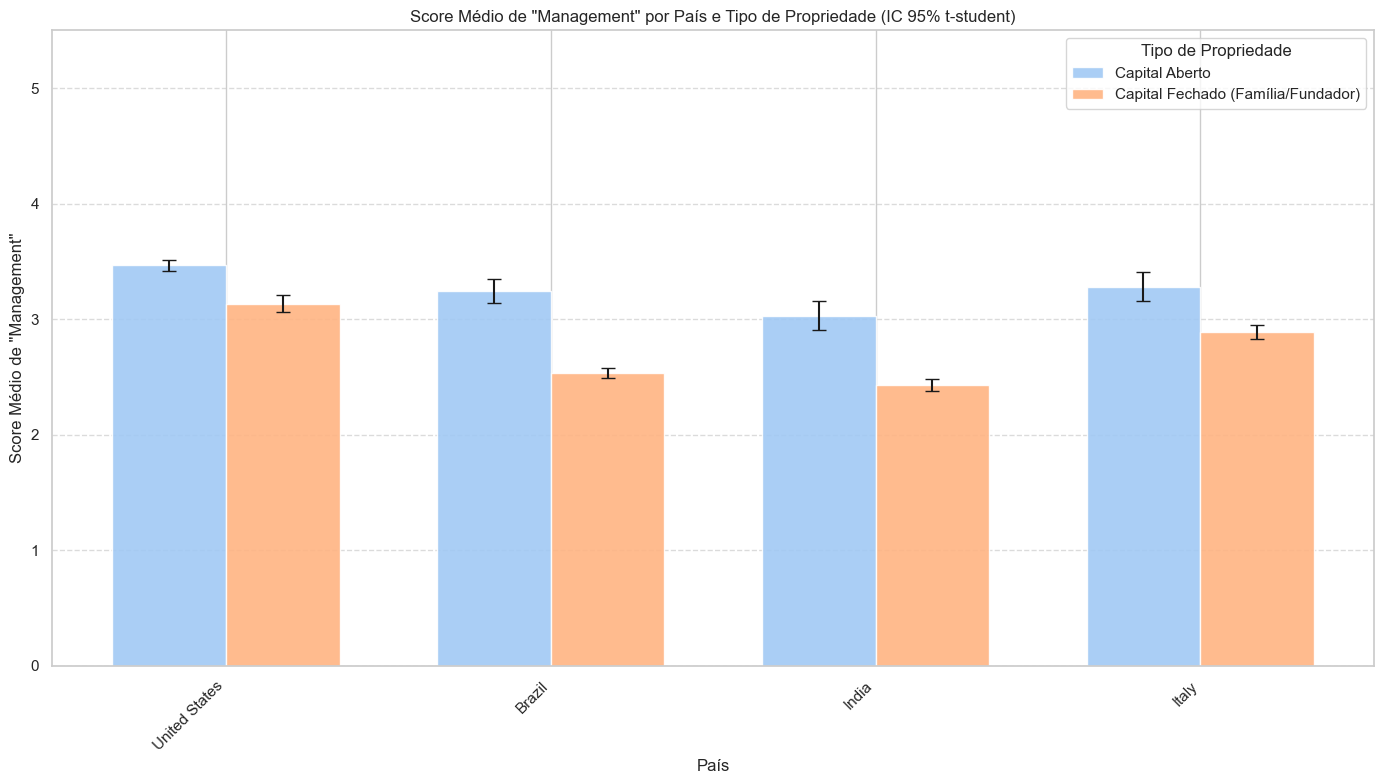

-----------------------------------


Arquivo Excel consolidado 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' salvo/atualizado. Abas relevantes para o Passo 11 (e outras se a lógica completa dos passos anteriores estiver ativa): Dados_Scores_Agregados_P3, CondMean_Ownership_P11, CondMean_Competition_P11, DataPlot_Ownership_P11.

--- Processamento Concluído ---


In [73]:
# Passo 11:

import pandas as pd
import numpy as np
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- Configurações de Exibição e Estilo ---
pd.set_option('display.max_rows', 40) 
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1200) 
pd.set_option('display.max_colwidth', 70)
sns.set_theme(style="whitegrid")

# --- Caminhos dos Arquivos ---
# Usando o caminho do arquivo Excel original que você confirmou
file_path_data_principal_wms = 'C:/Users/Inteli/Desktop/wms_da_textbook.xlsx'
# file_path_dicionario_variaveis_wms = 'C:/Users/Inteli/Desktop/VARIABLES_wms.xlsx' # Não usado ativamente na lógica principal abaixo
file_path_output_excel_consolidado = 'C:/Users/Inteli/Desktop/wms_analise_gestao.xlsx' 
file_path_grafico_passo11_ownership = 'C:/Users/Inteli/Desktop/management_by_ownership_country_p11.png'

# Nomes das abas
sheet_name_data_principal = 'wms_da_textbook' # Aba a ser lida do arquivo Excel principal
sheet_name_dados_com_scores = 'Dados_Scores_Agregados_P3'
sheet_name_media_pais_p4 = 'Media_Scores_Pais_P4'
sheet_name_ranking_pais_p4 = 'Ranking_Scores_Pais_P4'
# Abas de Freq_Dist_PAIS_P6 (serão geradas dinamicamente nos passos anteriores)
sheet_name_stats_ic_management_p9 = 'Stats_IC_Management_P9'
sheet_name_stats_ic_dimensoes_p10 = 'Stats_IC_Dimensoes_P10'
# Novas abas para Passo 11
sheet_name_cond_mean_ownership_p11 = 'CondMean_Ownership_P11'
sheet_name_cond_mean_competition_p11 = 'CondMean_Competition_P11'
sheet_name_data_plot_ownership_p11 = 'DataPlot_Ownership_P11'

# --- Passos 1 e 2 (Silenciosos): Carregamento e Limpeza Inicial ---
df_dados_limpos_wms = None 
try:
    df_dados_wms = pd.read_excel(file_path_data_principal_wms, sheet_name=sheet_name_data_principal, na_values=["NA", "N/A", "na", "n/a"])
    if df_dados_wms is not None and 'talent6' in df_dados_wms.columns:
        df_dados_limpos_wms = df_dados_wms.dropna(subset=['talent6']).copy()
    elif df_dados_wms is not None: 
        df_dados_limpos_wms = df_dados_wms.copy()
    else: 
        raise ValueError("Falha ao carregar dataset principal do Excel.")
except FileNotFoundError:
    print(f"ERRO CRÍTICO: Arquivo de dados principal '{file_path_data_principal_wms}' (aba '{sheet_name_data_principal}') não encontrado.")
    df_dados_limpos_wms = None
except Exception as e: 
    df_dados_limpos_wms = None
    print(f"ERRO CRÍTICO NOS PASSOS INICIAIS AO CARREGAR DADOS: {e}")

# --- Passos 3-10 (Lógica Executada Silenciosamente) ---
# Inicialização de DataFrames para resultados intermediários que seriam salvos no Excel
media_scores_pais_sorted_p4 = pd.DataFrame() 
ranking_scores_pais_sorted_p4 = pd.DataFrame() 
tabelas_frequencia_dfs_p6 = {} 
df_stats_ic_management_p9 = pd.DataFrame() 
df_stats_ic_dimensoes_p10 = pd.DataFrame() 
# DataFrames do Passo 11
cond_mean_ownership_p11 = pd.DataFrame()
cond_mean_competition_p11 = pd.DataFrame()
df_plot_data_ownership_p11 = pd.DataFrame()

if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
    # Passo 3: Criação de Scores (silencioso, mas necessário)
    if 'management' not in df_dados_limpos_wms.columns:
        cols_p3 = {'ops': ['lean1', 'lean2'], 'mon': ['perf1', 'perf2', 'perf3', 'perf4', 'perf5'],
                   'tgt': ['perf6', 'perf7', 'perf8', 'perf9', 'perf10'], 
                   'ppl': ['talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6']}
        for score_name_map, component_cols in cols_p3.items():
            actual_score_name = 'operations' if score_name_map == 'ops' else score_name_map
            existing_component_cols = [col for col in component_cols if col in df_dados_limpos_wms.columns]
            if existing_component_cols: 
                 df_dados_limpos_wms.loc[:, actual_score_name] = df_dados_limpos_wms[existing_component_cols].mean(axis=1)
            else: df_dados_limpos_wms.loc[:, actual_score_name] = np.nan
        
        management_base_cols_existentes = [col for sublist_key in ['ops', 'mon', 'tgt', 'ppl'] 
                                           for col in cols_p3[sublist_key] if col in df_dados_limpos_wms.columns]
        if management_base_cols_existentes:
            df_dados_limpos_wms.loc[:, 'management'] = df_dados_limpos_wms[management_base_cols_existentes].mean(axis=1)
        else: df_dados_limpos_wms.loc[:, 'management'] = np.nan

    # --- Passo 11 (Saída Visível): Tabelas de Média Condicional e Gráfico Comparativo por Ownership ---
    print("\n--- 11. Análise Condicional do Score 'Management' (Ownership e Competition) ---")
    paises_selecionados_p11 = ["United States", "Brazil", "India", "Italy"]
    df_paises_p11 = df_dados_limpos_wms[df_dados_limpos_wms['country'].isin(paises_selecionados_p11)].copy()

    if df_paises_p11.empty:
        print(f"AVISO: Nenhum dado encontrado para os países selecionados no Passo 11: {paises_selecionados_p11}")
    elif 'management' not in df_paises_p11.columns or df_paises_p11['management'].isnull().all():
        print("AVISO: Coluna 'management' não disponível ou sem dados válidos para o Passo 11.")
    else:
        # Tabela 1: Média condicional por 'ownership'
        if 'ownership' in df_paises_p11.columns:
            print("\n--- Tabela 1: Score 'Management' por País e Tipo de Propriedade ---")
            try:
                cond_mean_ownership_p11 = df_paises_p11.groupby(['country', 'ownership'])['management'].agg(
                    Media_Management='mean', Desvio_Padrao_Management='std', N_Firmas='count'
                ).round(3).sort_index()
                if not cond_mean_ownership_p11.empty:
                    print("Versão em texto:\n"); print(cond_mean_ownership_p11.to_string())
                    print("\nVersão HTML (renderizada no Jupyter):\n"); display(HTML(cond_mean_ownership_p11.to_html(notebook=True, border=1)))
                else: print("Tabela de ownership condicional vazia (verifique filtros e categorias).")
            except Exception as e: print(f"Erro ao gerar tabela por ownership: {e}")
            print("-----------------------------------\n")
        else:
            print("AVISO: Coluna 'ownership' NÃO encontrada no DataFrame filtrado para o Passo 11.")
            cond_mean_ownership_p11 = pd.DataFrame()

        # Tabela 2: Média condicional por 'competition'
        if 'competition' in df_paises_p11.columns:
            print("\n--- Tabela 2: Score 'Management' por País e Nível de Competição ---")
            try:
                cond_mean_competition_p11 = df_paises_p11.groupby(['country', 'competition'])['management'].agg(
                    Media_Management='mean', Desvio_Padrao_Management='std', N_Firmas='count'
                ).round(3).sort_index()
                if not cond_mean_competition_p11.empty:
                    print("Versão em texto:\n"); print(cond_mean_competition_p11.to_string())
                    print("\nVersão HTML (renderizada no Jupyter):\n"); display(HTML(cond_mean_competition_p11.to_html(notebook=True, border=1)))
                else: print("Tabela de competition condicional vazia.")
            except Exception as e: print(f"Erro ao gerar tabela por competition: {e}")
            print("-----------------------------------\n")
        else:
            print("AVISO: Coluna 'competition' NÃO encontrada no DataFrame filtrado para o Passo 11.")
            cond_mean_competition_p11 = pd.DataFrame()

        # Gráfico Comparativo: Dispersed Shareholders vs. Family/Founder controlled
        print("\n--- Gráfico Comparativo: 'Management' por Tipo de Propriedade Selecionada e País (com IC 95% t-student) ---")
        
        # Categorias de 'ownership' baseadas na sua informação confirmada:
        map_capital_aberto = ['Dispersed Shareholders'] 
        map_capital_fechado_familia = [
            'Founder owned, founder CEO', 'Family owned, family CEO',
            'Family owned, external CEO', 'Founder owned, external CEO',
            'Family owned, CEO unknown',  'Founder owned, CEO unknown'
        ]
            
        plot_data_list_p11 = []
        if 'ownership' in df_paises_p11.columns: 
            for pais_p11_loop in paises_selecionados_p11:
                df_pais_atual_p11 = df_paises_p11[df_paises_p11['country'] == pais_p11_loop]
                if df_pais_atual_p11.empty: continue

                for group_name, map_list in [('Capital Aberto', map_capital_aberto), 
                                             ('Capital Fechado (Família/Fundador)', map_capital_fechado_familia)]:
                    scores_group = df_pais_atual_p11[df_pais_atual_p11['ownership'].isin(map_list)]['management'].dropna()
                    
                    entry = {'País': pais_p11_loop, 'Tipo de Propriedade': group_name, 
                             'Média Management': np.nan, 'N': 0, 'Margem Erro IC95%': 0.0}
                    if len(scores_group) >= 2: # Precisa de pelo menos 2 observações para std e IC
                        media = scores_group.mean(); n = len(scores_group); sem = stats.sem(scores_group)
                        ic_margin = sem * stats.t.ppf((1 + 0.95) / 2., n - 1) if pd.notna(sem) and sem > 0 and n > 1 else 0.0
                        entry.update({'Média Management': media, 'N':n, 'Margem Erro IC95%': ic_margin})
                    elif len(scores_group) == 1: # Se N=1, média é o próprio valor, sem IC significativo
                        entry.update({'Média Management': scores_group.mean(), 'N':1, 'Margem Erro IC95%': 0.0})
                    # Se len(scores_group) == 0, mantém os defaults (Média NaN, N 0, Margem Erro 0.0)
                    plot_data_list_p11.append(entry)
            
            df_plot_data_ownership_p11 = pd.DataFrame(plot_data_list_p11)
            
            num_cols_to_round_p11_plot = ['Média Management', 'Margem Erro IC95%']
            for col_plot in num_cols_to_round_p11_plot:
                if col_plot in df_plot_data_ownership_p11.columns:
                    df_plot_data_ownership_p11[col_plot] = df_plot_data_ownership_p11[col_plot].round(3)

            print("\nDados preparados para o gráfico comparativo por Ownership (Passo 11):\n")
            # Mostra a tabela que alimenta o gráfico para depuração e análise
            display(HTML(df_plot_data_ownership_p11.to_html(notebook=True, border=1, index=False)))
            print("\n")
            
            # Preparação dos dados para plt.bar de forma robusta
            labels_paises_plot = paises_selecionados_p11
            x_plot = np.arange(len(labels_paises_plot))
            width_plot = 0.35
            
            # Extrai os dados para cada tipo de propriedade, garantindo que as listas tenham o tamanho dos países
            means_aberto_plot = df_plot_data_ownership_p11[df_plot_data_ownership_p11['Tipo de Propriedade'] == 'Capital Aberto'].set_index('País').reindex(labels_paises_plot)['Média Management'].fillna(0).tolist()
            errors_aberto_plot = df_plot_data_ownership_p11[df_plot_data_ownership_p11['Tipo de Propriedade'] == 'Capital Aberto'].set_index('País').reindex(labels_paises_plot)['Margem Erro IC95%'].fillna(0).tolist()
            
            means_fechado_plot = df_plot_data_ownership_p11[df_plot_data_ownership_p11['Tipo de Propriedade'] == 'Capital Fechado (Família/Fundador)'].set_index('País').reindex(labels_paises_plot)['Média Management'].fillna(0).tolist()
            errors_fechado_plot = df_plot_data_ownership_p11[df_plot_data_ownership_p11['Tipo de Propriedade'] == 'Capital Fechado (Família/Fundador)'].set_index('País').reindex(labels_paises_plot)['Margem Erro IC95%'].fillna(0).tolist()

            # Verifica se há alguma média > 0 para justificar o plot efetivo de barras visíveis
            plot_condition_met = any(m > 0 for m in means_aberto_plot) or any(m > 0 for m in means_fechado_plot)

            if plot_condition_met :
                fig, ax = plt.subplots(figsize=(14, 8))
                
                rects1 = ax.bar(x_plot - width_plot/2, means_aberto_plot, width_plot, 
                                yerr=errors_aberto_plot, label='Capital Aberto', 
                                capsize=5, color=sns.color_palette("pastel")[0], alpha=0.9)
                
                rects2 = ax.bar(x_plot + width_plot/2, means_fechado_plot, width_plot, 
                                yerr=errors_fechado_plot, label='Capital Fechado (Família/Fundador)', 
                                capsize=5, color=sns.color_palette("pastel")[1], alpha=0.9)

                ax.set_ylabel('Score Médio de "Management"')
                ax.set_xlabel('País')
                ax.set_title('Score Médio de "Management" por País e Tipo de Propriedade (IC 95% t-student)')
                ax.set_xticks(x_plot)
                ax.set_xticklabels(labels_paises_plot, rotation=45, ha="right")
                ax.legend(title='Tipo de Propriedade')
                ax.set_ylim(0, 5.5) # Ajustado para começar em 0 e ir um pouco além de 5
                ax.grid(True, axis='y', linestyle='--', alpha=0.7)
                fig.tight_layout()

                try:
                    plt.savefig(file_path_grafico_passo11_ownership, bbox_inches='tight')
                    print(f"Gráfico comparativo por ownership salvo em: '{file_path_grafico_passo11_ownership}'")
                except Exception as e_save_plot_p11: print(f"ERRO ao salvar o gráfico do Passo 11: {e_save_plot_p11}")
                plt.show()
            else:
                print("Não há dados com média > 0 para plotar no gráfico comparativo por tipo de propriedade.")
        else:
            print("AVISO: Coluna 'ownership' não encontrada no DataFrame filtrado para os países. Gráfico não gerado.")
        print("-----------------------------------\n")

        # --- Salvando/Atualizando o Arquivo Excel CONSOLIDADO ---
        # (Lógica de salvamento do Excel como antes, incluindo as novas abas do Passo 11)
        excel_sheets_saved_or_updated = []
        # print(f"\n--- Salvando/Atualizando Resultados no Arquivo Excel Consolidado: {file_path_output_excel_consolidado} ---")
        try:
            with pd.ExcelWriter(file_path_output_excel_consolidado, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
                # Abas dos passos anteriores (a lógica para popular estas variáveis precisaria estar completa acima)
                if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                   df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                # Novas abas do Passo 11
                if not cond_mean_ownership_p11.empty:
                    cond_mean_ownership_p11.to_excel(writer, sheet_name=sheet_name_cond_mean_ownership_p11, index=True); excel_sheets_saved_or_updated.append(sheet_name_cond_mean_ownership_p11)
                if not cond_mean_competition_p11.empty:
                    cond_mean_competition_p11.to_excel(writer, sheet_name=sheet_name_cond_mean_competition_p11, index=True); excel_sheets_saved_or_updated.append(sheet_name_cond_mean_competition_p11)
                if not df_plot_data_ownership_p11.empty: 
                     df_plot_data_ownership_p11.to_excel(writer, sheet_name=sheet_name_data_plot_ownership_p11, index=False); excel_sheets_saved_or_updated.append(sheet_name_data_plot_ownership_p11)
        # ... (restante da lógica de salvamento do Excel como antes, com FileNotFoundError) ...
        except FileNotFoundError: 
            try: 
                with pd.ExcelWriter(file_path_output_excel_consolidado, engine='openpyxl', mode='w') as writer:
                    # ... (lógica de salvamento para novo arquivo) ...
                    if df_dados_limpos_wms is not None and not df_dados_limpos_wms.empty:
                         df_dados_limpos_wms.to_excel(writer, sheet_name=sheet_name_dados_com_scores, index=False); excel_sheets_saved_or_updated.append(sheet_name_dados_com_scores)
                    if not cond_mean_ownership_p11.empty:
                        cond_mean_ownership_p11.to_excel(writer, sheet_name=sheet_name_cond_mean_ownership_p11, index=True); excel_sheets_saved_or_updated.append(sheet_name_cond_mean_ownership_p11)
                    if not cond_mean_competition_p11.empty:
                        cond_mean_competition_p11.to_excel(writer, sheet_name=sheet_name_cond_mean_competition_p11, index=True); excel_sheets_saved_or_updated.append(sheet_name_cond_mean_competition_p11)
                    if not df_plot_data_ownership_p11.empty:
                         df_plot_data_ownership_p11.to_excel(writer, sheet_name=sheet_name_data_plot_ownership_p11, index=False); excel_sheets_saved_or_updated.append(sheet_name_data_plot_ownership_p11)
            except Exception as e_create_excel: print(f"ERRO ao CRIAR e salvar o arquivo Excel consolidado: {e_create_excel}")
        except Exception as e_save_excel: print(f"ERRO ao ATUALIZAR o arquivo Excel consolidado: {e_save_excel}")
        
        if excel_sheets_saved_or_updated: print(f"\nArquivo Excel consolidado '{file_path_output_excel_consolidado}' salvo/atualizado. Abas relevantes para o Passo 11 (e outras se a lógica completa dos passos anteriores estiver ativa): {', '.join(excel_sheets_saved_or_updated)}.")
        
print("\n--- Processamento Concluído ---")